In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import admg_rkhs_discovery
import pandas as pd
from sklearn.preprocessing import StandardScaler

/opt/anaconda3/envs/admg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# X1 --> X2, X1 <--> X2

## Cov = 0.3

#### exponential acyclicity constraint, T = 4, lambda and tau as default

In [4]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0.3],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.3, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
x1 = epsilon[:, 0]
x2 = 10*torch.sin(x1)
# Step 4: Combine these results into a new tensor of shape [n, 2]
x1_true = x1 #+ epsilon[:, 0]
x2_true = x2 + epsilon[:, 1]
X = torch.stack((x1, x2), dim=1)
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit()
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/23000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.1

Inner iteration 0
	h(W(model)): 0.004439972552124701
	score(model): 3.3114903025376665
	 mle: 32.80004531210217
	 mse: 16.40487334583641
	W1: tensor([[1.0000e-04, 1.3371e+00],
        [7.0476e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004439874318426629
	structure loss: 9.823369807263754e-08
	Sigma: tensor([[ 1.0000, -0.0234],
        [-0.0234,  1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9765917451687463


  0%|          | 2/23000.0 [00:14<46:30:24,  7.28s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.02111527293274586
	score(model): 0.22553150224670207
	 mle: 1.6729777239534867
	 mse: 1.0531706641171954
	W1: tensor([[1.0000e-04, 7.6671e+00],
        [2.6537e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02069816396851598
	structure loss: 0.00041710896422987934
	Sigma: tensor([[0.5066, 0.2664],
        [0.2664, 1.6667]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4484038755749699


  0%|          | 3/23000.0 [00:29<66:08:58, 10.36s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.020673431742592185
	score(model): 0.224753714966883
	 mle: 1.6721815818316785
	 mse: 1.0798576631163523
	W1: tensor([[1.0000e-04, 7.6260e+00],
        [2.6261e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0200535827105095
	structure loss: 0.0006198490320826859
	Sigma: tensor([[0.5094, 0.3265],
        [0.3265, 1.6044]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.41942505972955607


  0%|          | 4/23000.0 [00:43<74:54:03, 11.73s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.02064483093890622
	score(model): 0.22474727473964096
	 mle: 1.673051964692659
	 mse: 1.0858116393743242
	W1: tensor([[1.0000e-04, 7.6163e+00],
        [2.6257e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.019996643593963803
	structure loss: 0.0006481873449424164
	Sigma: tensor([[0.5091, 0.3343],
        [0.3343, 1.6159]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4159961418105937


  0%|          | 5/23000.0 [00:56<77:38:30, 12.16s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.020647973010052643
	score(model): 0.22474955950261324
	 mle: 1.6730603322527404
	 mse: 1.0859746145172038
	W1: tensor([[1.0000e-04, 7.6160e+00],
        [2.6260e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.019998957788782246
	structure loss: 0.0006490152212703972
	Sigma: tensor([[0.5091, 0.3345],
        [0.3345, 1.6163]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4158847735775061


  0%|          | 6/23000.0 [01:09<79:11:42, 12.40s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.020646705769438015
	score(model): 0.2247498920040974
	 mle: 1.6730743567379407
	 mse: 1.0859590021669707
	W1: tensor([[1.0000e-04, 7.6160e+00],
        [2.6259e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.019997909976804173
	structure loss: 0.0006487957926338411
	Sigma: tensor([[0.5091, 0.3344],
        [0.3344, 1.6162]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.41590928595543464

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.05

Inner iteration 0
	h(W(model)): 0.470981148924494
	score(model): 0.6107369487565767
	 mle: 2.4693750177364038
	 mse: 1.853394930537475
	W1: tensor([[1.0000e-04, 6.5115e+00],
        [1.4898e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.4705066532262441
	structure loss: 0.00047449569824992155
	Sigma: tensor([[0.5091, 0.3344],
        [0.3344, 1.6162]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.41590923649607353


  0%|          | 8/23000.0 [01:21<59:31:00,  9.32s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.005639687888993667
	score(model): 0.11845151805855349
	 mle: 1.8924237917224305
	 mse: 1.1868549759593348
	W1: tensor([[1.0000e-04, 7.5893e+00],
        [1.2842e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004749016707120912
	structure loss: 0.0008906711818727547
	Sigma: tensor([[0.6222, 0.3932],
        [0.3932, 1.6283]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.48678005673385477


  0%|          | 9/23000.0 [01:33<63:39:32,  9.97s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.005551273473014821
	score(model): 0.11845750365345359
	 mle: 1.8938869240840872
	 mse: 1.1831696436580086
	W1: tensor([[1.0000e-04, 7.5965e+00],
        [1.2744e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004685754022764943
	structure loss: 0.0008655194502498777
	Sigma: tensor([[0.6245, 0.3873],
        [0.3873, 1.6197]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.49158959296508264


  0%|          | 10/23000.0 [01:44<67:00:13, 10.49s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.005545953042080875
	score(model): 0.11846723510878708
	 mle: 1.8941924065696962
	 mse: 1.183283246600783
	W1: tensor([[1.0000e-04, 7.5965e+00],
        [1.2736e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004680033532640238
	structure loss: 0.0008659195094406378
	Sigma: tensor([[0.6247, 0.3874],
        [0.3874, 1.6196]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4917010201715386


  0%|          | 11/23000.0 [01:57<69:43:36, 10.92s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.005545029100998196
	score(model): 0.11847133702216264
	 mle: 1.8942947169563022
	 mse: 1.183324809734622
	W1: tensor([[1.0000e-04, 7.5964e+00],
        [1.2734e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00467898445761783
	structure loss: 0.0008660446433803662
	Sigma: tensor([[0.6248, 0.3874],
        [0.3874, 1.6197]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4917400273592195


  0%|          | 12/23000.0 [02:08<71:23:44, 11.18s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.005544940489216875
	score(model): 0.11847219402474488
	 mle: 1.894314051779768
	 mse: 1.183333867568125
	W1: tensor([[1.0000e-04, 7.5964e+00],
        [1.2734e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004678866854570529
	structure loss: 0.0008660736346463461
	Sigma: tensor([[0.6248, 0.3874],
        [0.3874, 1.6197]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.49174655860699945

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.025

Inner iteration 0
	h(W(model)): 0.2913113643568346
	score(model): 0.3635327230248003
	 mle: 2.564254956505171
	 mse: 1.8811438253257868
	W1: tensor([[1.0000e-04, 6.6166e+00],
        [1.1523e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.29065409714452306
	structure loss: 0.0006572672123115186
	Sigma: tensor([[0.6248, 0.3874],
        [0.3874, 1.6197]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4917465601180133


  0%|          | 14/23000.0 [02:20<56:22:29,  8.83s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0018830659049534815
	score(model): 0.061458330178729995
	 mle: 2.0165591257834965
	 mse: 1.2215122688900584
	W1: tensor([[1.0000e-04, 7.6811e+00],
        [6.3086e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001174033431827315
	structure loss: 0.0007090324731261666
	Sigma: tensor([[0.6794, 0.3467],
        [0.3467, 1.5839]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.561810937653423


  0%|          | 15/23000.0 [02:32<61:02:25,  9.56s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.001857890770604178
	score(model): 0.0614547982516178
	 mle: 2.0178470040241794
	 mse: 1.224367062214536
	W1: tensor([[1.0000e-04, 7.6728e+00],
        [6.2498e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0011498059265813154
	structure loss: 0.0007080848440228626
	Sigma: tensor([[0.6802, 0.3468],
        [0.3468, 1.5700]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5609719880388312


  0%|          | 16/23000.0 [02:44<65:35:17, 10.27s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.001858134511268778
	score(model): 0.061457062667976084
	 mle: 2.017944859261219
	 mse: 1.224528911366748
	W1: tensor([[1.0000e-04, 7.6725e+00],
        [6.2490e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001149407981556383
	structure loss: 0.0007087265297123951
	Sigma: tensor([[0.6802, 0.3470],
        [0.3470, 1.5702]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5609163455061157


  0%|          | 17/23000.0 [03:00<73:59:19, 11.59s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0018581419245970892
	score(model): 0.061457414863952856
	 mle: 2.017958836633572
	 mse: 1.2245336232114452
	W1: tensor([[1.0000e-04, 7.6725e+00],
        [6.2490e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0011494102895914793
	structure loss: 0.0007087316350056099
	Sigma: tensor([[0.6802, 0.3470],
        [0.3470, 1.5702]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5609236687668708


  0%|          | 18/23000.0 [03:12<75:52:08, 11.88s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.001858391337768245
	score(model): 0.06145745323815078
	 mle: 2.017943617791095
	 mse: 1.2244782496653401
	W1: tensor([[1.0000e-04, 7.6727e+00],
        [6.2498e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0011497511807951888
	structure loss: 0.0007086401569730563
	Sigma: tensor([[0.6802, 0.3469],
        [0.3469, 1.5702]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.560939446306503

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.0125

Inner iteration 0
	h(W(model)): 0.613003366171481
	score(model): 0.6507013684484588
	 mle: 2.6864341035305763
	 mse: 1.8953584607577054
	W1: tensor([[1.0000e-04, 6.6956e+00],
        [1.6530e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.612463394854271
	structure loss: 0.000539971317209953
	Sigma: tensor([[0.6802, 0.3469],
        [0.3469, 1.5702]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5609408065740292


  0%|          | 20/23000.0 [03:26<61:36:29,  9.65s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.001498571337797969
	score(model): 0.033312581753374176
	 mle: 2.19729192942275
	 mse: 1.529914685422972
	W1: tensor([[1.0000e-04, 7.4493e+00],
        [3.5270e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000345177181360512
	structure loss: 0.001153394156437457
	Sigma: tensor([[0.6460, 0.4559],
        [0.4559, 2.2855]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5277821612227823


  0%|          | 21/23000.0 [03:39<67:11:40, 10.53s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0007646067670061868
	score(model): 0.032028820159661256
	 mle: 2.1328540549762107
	 mse: 1.2803849547139556
	W1: tensor([[1.0000e-04, 7.7713e+00],
        [3.0719e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002849817109429331
	structure loss: 0.00047962505606325367
	Sigma: tensor([[0.7085, 0.2818],
        [0.2818, 1.5653]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6241057990896037


  0%|          | 22/23000.0 [03:53<73:02:30, 11.44s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0007677512287068899
	score(model): 0.032032601224156486
	 mle: 2.1330078922062867
	 mse: 1.2813433289504883
	W1: tensor([[1.0000e-04, 7.7698e+00],
        [3.0737e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002852015864776014
	structure loss: 0.0004825496422292885
	Sigma: tensor([[0.7082, 0.2827],
        [0.2827, 1.5682]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6235759186509777


  0%|          | 23/23000.0 [04:07<76:41:09, 12.02s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0007677290388750915
	score(model): 0.03203268033944862
	 mle: 2.133015400975947
	 mse: 1.281340235212798
	W1: tensor([[1.0000e-04, 7.7699e+00],
        [3.0737e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002851955141105478
	structure loss: 0.0004825335247645437
	Sigma: tensor([[0.7082, 0.2827],
        [0.2827, 1.5682]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6235841631953267


  0%|          | 24/23000.0 [04:21<80:08:07, 12.56s/it]


mu 0.0125

Inner iteration 5000
	h(W(model)): 0.0007781851310307089
	score(model): 0.03204288023304684
	 mle: 2.133069669636706
	 mse: 1.2817911821052927
	W1: tensor([[1.0000e-04, 7.7683e+00],
        [3.1264e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00029495525891132246
	structure loss: 0.0004832298721193864
	Sigma: tensor([[0.7081, 0.2830],
        [0.2830, 1.5685]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6234027376011133


  0%|          | 25/23000.0 [04:34<80:23:14, 12.60s/it]


mu 0.0125

Inner iteration 6000
	h(W(model)): 0.000773587261372757
	score(model): 0.0320377248004243
	 mle: 2.132970323800002
	 mse: 1.281469230344748
	W1: tensor([[1.0000e-04, 7.7695e+00],
        [3.1019e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00029042613195651157
	structure loss: 0.0004831611294162455
	Sigma: tensor([[0.7081, 0.2829],
        [0.2829, 1.5684]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6234139939672575


  0%|          | 26/23000.0 [04:46<80:08:27, 12.56s/it]


mu 0.0125

Inner iteration 7000
	h(W(model)): 0.0007984284977129907
	score(model): 0.03206429150503815
	 mle: 2.133292530415238
	 mse: 1.2824778534613952
	W1: tensor([[1.0000e-04, 7.7655e+00],
        [3.2348e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00031552604155482555
	structure loss: 0.0004829024561581652
	Sigma: tensor([[0.7080, 0.2830],
        [0.2830, 1.5685]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6233020484812584


  0%|          | 27/23000.0 [04:59<70:53:03, 11.11s/it]


mu 0.0125

Inner iteration 7999
	h(W(model)): 0.0007770417556410789
	score(model): 0.03204117806115061
	 mle: 2.132844143828654
	 mse: 1.2807711392414076
	W1: tensor([[1.0000e-04, 7.7721e+00],
        [3.1201e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00029404900777985077
	structure loss: 0.00048299274786122815
	Sigma: tensor([[0.7082, 0.2828],
        [0.2828, 1.5682]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.623523591722838
final_W1:  tensor([[1.0000e-04, 7.7721e+00],
        [3.1201e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.7082, 0.2828],
        [0.2828, 1.5682]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[0.79352661 0.26345698]
 [0.26345698 1.42379077]]
estimated Sigma:  [[0.70817719 0.        ]
 [0.         1.56817375]]


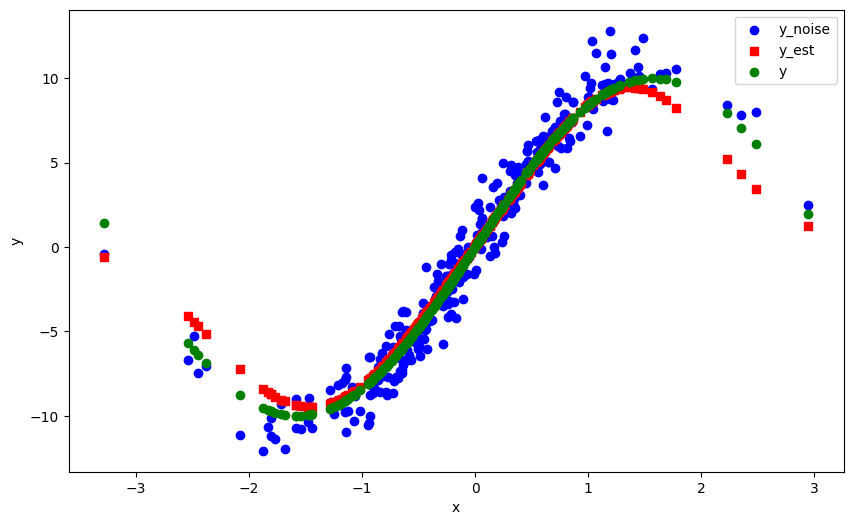

The programm is closed


In [5]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

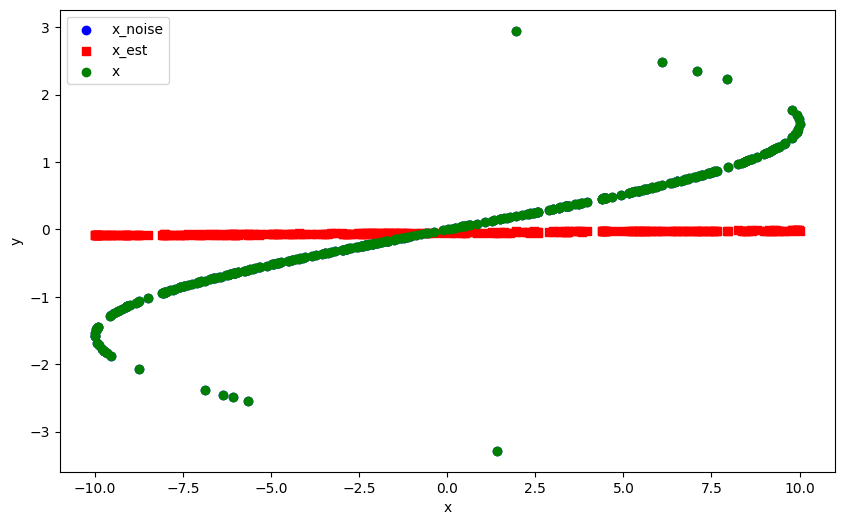

The programm is closed


In [6]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], X_true.detach().numpy()[:, 0], label='x_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

### classical hyperparameter

In [2]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0.3],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.3, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
x1 = epsilon[:, 0]
x2 = 10*torch.sin(x1)
# Step 4: Combine these results into a new tensor of shape [n, 2]
x1_true = x1 #+ epsilon[:, 0]
x2_true = x2 + epsilon[:, 1]
X = torch.stack((x1, x2), dim=1)
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit(lambda1=1e-3, tau=1e-4, T = 6, mu_init = 0.1, lr=0.03, w_threshold=0.0)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03


  0%|          | 1/33000.0 [00:00<3:34:30,  2.56it/s]


mu 0.1

Inner iteration 0
	h(W(model)): 18.164453177270303
	score(model): 19.27998267251155
	 mle: 11.08575737341725
	 mse: 5.598004082193682
	W1: tensor([[1.0000e-04, 7.1954e+00],
        [8.3767e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 18.164451627911546
	structure loss: 1.5493587568471412e-06
	Sigma: tensor([[1.0000, 0.0172],
        [0.0172, 1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9828170218262627


  0%|          | 2/33000.0 [00:13<72:09:57,  7.87s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.030014344816715017
	score(model): 0.2621379817276242
	 mle: 2.319609700437149
	 mse: 1.7236151055369788
	W1: tensor([[1.0000e-04, 6.6986e+00],
        [3.5194e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.027788687678736324
	structure loss: 0.0022256571379786934
	Sigma: tensor([[0.5731, 0.7043],
        [0.7043, 4.9060]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4614598783129102


  0%|          | 3/33000.0 [00:25<90:19:57,  9.86s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.025691068351067783
	score(model): 0.23563418130384733
	 mle: 2.097857764330907
	 mse: 1.4428543879974784
	W1: tensor([[1.0000e-04, 7.0106e+00],
        [3.1206e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02392998601828422
	structure loss: 0.0017610823327835617
	Sigma: tensor([[0.6255, 0.5986],
        [0.5986, 2.8842]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4766499129053832


  0%|          | 4/33000.0 [00:37<98:32:35, 10.75s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.02371776245366723
	score(model): 0.22780817723193214
	 mle: 2.0394275510249584
	 mse: 1.2265723692968806
	W1: tensor([[1.0000e-04, 7.2623e+00],
        [2.9537e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.023006091178011445
	structure loss: 0.0007116712756557834
	Sigma: tensor([[0.6531, 0.3673],
        [0.3673, 1.8447]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5489438623861266


  0%|          | 5/33000.0 [00:50<103:59:50, 11.35s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.02435534493586771
	score(model): 0.22639339967324576
	 mle: 2.018874483714785
	 mse: 1.1304643615084533
	W1: tensor([[1.0000e-04, 7.4268e+00],
        [2.9618e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02419211599773119
	structure loss: 0.00016322893813652123
	Sigma: tensor([[0.6561, 0.1720],
        [0.1720, 1.5978]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6256195386198219


  0%|          | 6/33000.0 [01:03<109:40:43, 11.97s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.024600401031815624
	score(model): 0.22603418430167344
	 mle: 2.0128207695981915
	 mse: 1.1140802744017757
	W1: tensor([[1.0000e-04, 7.4706e+00],
        [2.9644e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02452190819047928
	structure loss: 7.84928413363438e-05
	Sigma: tensor([[0.6560, 0.1186],
        [0.1186, 1.5626]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.640757762908975

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.05

Inner iteration 0
	h(W(model)): 12.499018692196884
	score(model): 13.457079974724413
	 mle: 19.03604982464342
	 mse: 14.073007052444346
	W1: tensor([[1.0000e-04, 4.1301e+00],
        [1.2106e+00, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 12.498992645725298
	structure loss: 2.6046471585772224e-05
	Sigma: tensor([[0.6560, 0.1186],
        [0.1186, 1.5626]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6407604354924649


  0%|          | 8/33000.0 [01:17<86:36:03,  9.45s/it] 


mu 0.05

Inner iteration 1000
	h(W(model)): 0.012298706678838079
	score(model): 0.1614143916180475
	 mle: 2.98041851264306
	 mse: 2.3553964973870274
	W1: tensor([[1.0000e-04, 6.2415e+00],
        [2.1546e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.009042846219862621
	structure loss: 0.0032558604589754576
	Sigma: tensor([[0.6650, 0.9142],
        [0.9142, 8.6379]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5615668963119412


  0%|          | 9/33000.0 [01:29<94:19:01, 10.29s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.007942349725798667
	score(model): 0.12706664289198463
	 mle: 2.380721151149373
	 mse: 1.571020901258653
	W1: tensor([[1.0000e-04, 7.0122e+00],
        [1.5358e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005798989691214729
	structure loss: 0.0021433600345839385
	Sigma: tensor([[0.7845, 0.6602],
        [0.6602, 3.1060]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6099148306647223


  0%|          | 10/33000.0 [01:42<99:21:10, 10.84s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.005725093697013781
	score(model): 0.12010502971426563
	 mle: 2.2861255592223158
	 mse: 1.2921918496426945
	W1: tensor([[1.0000e-04, 7.3589e+00],
        [1.3755e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0051230600127802894
	structure loss: 0.0006020336842334911
	Sigma: tensor([[0.8389, 0.3334],
        [0.3334, 1.6823]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.723046814562825


  0%|          | 11/33000.0 [01:54<103:28:03, 11.29s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.005433178354863311
	score(model): 0.11978390387399174
	 mle: 2.28550845188855
	 mse: 1.2518788536720133
	W1: tensor([[1.0000e-04, 7.4425e+00],
        [1.3602e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005123845068232935
	structure loss: 0.00030933328663037586
	Sigma: tensor([[0.8483, 0.2363],
        [0.2363, 1.6000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7802224059874829


  0%|          | 12/33000.0 [02:06<106:14:00, 11.59s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.005826008490319312
	score(model): 0.12012759079554255
	 mle: 2.284524473609789
	 mse: 1.251884043651064
	W1: tensor([[1.0000e-04, 7.4432e+00],
        [1.4100e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005507438456951785
	structure loss: 0.0003185700333675264
	Sigma: tensor([[0.8475, 0.2398],
        [0.2398, 1.6021]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7777856519477699

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.025

Inner iteration 0
	h(W(model)): 12.11426653359063
	score(model): 12.543884172781432
	 mle: 17.08130813756602
	 mse: 13.421023899401286
	W1: tensor([[1.0000e-04, 3.4061e+00],
        [1.4451e+00, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 12.114187818157394
	structure loss: 7.871543323645369e-05
	Sigma: tensor([[0.8476, 0.2398],
        [0.2398, 1.6021]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7778102928335373


  0%|          | 14/33000.0 [02:20<86:01:45,  9.39s/it] 


mu 0.025

Inner iteration 1000
	h(W(model)): 0.005410722574193026
	score(model): 0.07488808211339915
	 mle: 2.7774292626494734
	 mse: 2.191450364731446
	W1: tensor([[1.0000e-04, 6.6386e+00],
        [9.5980e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.002029987256214838
	structure loss: 0.003380735317978188
	Sigma: tensor([[0.7701, 0.8758],
        [0.8758, 5.2524]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.605025622864724


  0%|          | 15/33000.0 [02:32<93:10:48, 10.17s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0022701531433605197
	score(model): 0.06384781743171222
	 mle: 2.4615194331239785
	 mse: 1.4432698348990702
	W1: tensor([[1.0000e-04, 7.2985e+00],
        [7.0235e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0013138702444868144
	structure loss: 0.0009562828988737052
	Sigma: tensor([[0.8936, 0.4237],
        [0.4237, 2.3984]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7825356919378997


  0%|          | 16/33000.0 [02:44<97:38:56, 10.66s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0015154683273000537
	score(model): 0.06174482516939384
	 mle: 2.4076658460773057
	 mse: 1.3211826709286525
	W1: tensor([[1.0000e-04, 7.4816e+00],
        [6.5650e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0012062585612118149
	structure loss: 0.0003092097660882388
	Sigma: tensor([[0.9343, 0.2350],
        [0.2350, 1.6207]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8615190303450573


  0%|          | 17/33000.0 [02:56<100:53:48, 11.01s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0015072130325545017
	score(model): 0.06173051742200443
	 mle: 2.4074186824261035
	 mse: 1.318887232139069
	W1: tensor([[1.0000e-04, 7.4847e+00],
        [6.5661e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0012076664541762483
	structure loss: 0.0002995465783782534
	Sigma: tensor([[0.9351, 0.2312],
        [0.2312, 1.5897]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8616418468126935


  0%|          | 18/33000.0 [03:08<103:19:17, 11.28s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0017799374805069716
	score(model): 0.06199759068791683
	 mle: 2.407190477644757
	 mse: 1.3186483162278315
	W1: tensor([[1.0000e-04, 7.4876e+00],
        [7.2496e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0014732930025922464
	structure loss: 0.00030664447791472517
	Sigma: tensor([[0.9342, 0.2339],
        [0.2339, 1.5912]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8594490217946005

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.0125

Inner iteration 0
	h(W(model)): 8.583298568496119
	score(model): 8.757624773822783
	 mle: 13.863278964714327
	 mse: 10.800331545426046
	W1: tensor([[1.0000e-04, 3.1492e+00],
        [1.3156e+00, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 8.58323485493208
	structure loss: 6.371356403889195e-05
	Sigma: tensor([[0.9342, 0.2339],
        [0.2339, 1.5912]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8594376535826392


  0%|          | 20/33000.0 [03:22<85:42:57,  9.36s/it] 


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00263515560935304
	score(model): 0.05600209929989336
	 mle: 4.269080041585581
	 mse: 17.743615941304157
	W1: tensor([[1.0000e-04, 9.4102e-01],
        [7.6573e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0025960856852424996
	structure loss: 3.906992411054034e-05
	Sigma: tensor([[ 0.2944,  0.6620],
        [ 0.6620, 19.0242]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.27099230295908094


  0%|          | 21/33000.0 [03:38<98:40:01, 10.77s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0005413722547495423
	score(model): 0.05304734479852216
	 mle: 4.200149801595364
	 mse: 21.825146771191154
	W1: tensor([[1.0000e-04, 1.9787e-01],
        [1.6616e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0005405495614665412
	structure loss: 8.226932830011436e-07
	Sigma: tensor([[ 0.2215,  0.3510],
        [ 0.3510, 27.0300]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2169533086974323


  0%|          | 22/33000.0 [03:51<103:55:31, 11.34s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.00013935170806092788
	score(model): 0.05165754851500201
	 mle: 4.121390548046505
	 mse: 22.67957552565282
	W1: tensor([[1.0000e-04, 5.9442e-02],
        [2.8074e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00013926236797345837
	structure loss: 8.934008746951669e-08
	Sigma: tensor([[ 0.2062,  0.1042],
        [ 0.1042, 33.1492]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.20590098068555665


  0%|          | 23/33000.0 [04:03<106:25:41, 11.62s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0001365898600583715
	score(model): 0.05163643899644829
	 mle: 4.1199185596624055
	 mse: 22.686017445192604
	W1: tensor([[1.0000e-04, 5.8297e-02],
        [2.8347e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001365702866094054
	structure loss: 1.9573448966102086e-08
	Sigma: tensor([[ 0.2056,  0.0483],
        [ 0.0483, 33.3559]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.20553612472602545


  0%|          | 24/33000.0 [04:15<108:17:15, 11.82s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.0001365278782703125
	score(model): 0.05163594268246797
	 mle: 4.119883485183572
	 mse: 22.686164818639018
	W1: tensor([[1.0000e-04, 5.8271e-02],
        [2.8354e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0001365093636103154
	structure loss: 1.8514659997086354e-08
	Sigma: tensor([[ 0.2056,  0.0470],
        [ 0.0470, 33.3609]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.20552722395621092

Dagma iter t=5 -- mu: 0.00625 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.00625

Inner iteration 0
	h(W(model)): 11.659952529175003
	score(model): 11.718139766297618
	 mle: 9.273858932999655
	 mse: 62.52269209193882
	W1: tensor([[1.0000e-04, 7.1718e+00],
        [6.7334e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 11.659941063560403
	structure loss: 1.1465614599970309e-05
	Sigma: tensor([[ 0.2056,  0.0470],
        [ 0.0470, 33.3609]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.205527224

  0%|          | 26/33000.0 [04:28<85:21:52,  9.32s/it] 


mu 0.00625

Inner iteration 1000
	h(W(model)): 5.025813603352442e-05
	score(model): 0.027544161525465728
	 mle: 4.398779848348374
	 mse: 22.762915417642223
	W1: tensor([[1.0000e-04, 5.0471e-02],
        [1.9856e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 5.0236814068238544e-05
	structure loss: 2.132196528587877e-08
	Sigma: tensor([[ 0.2839,  0.0713],
        [ 0.0713, 26.9298]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2837156820294626


  0%|          | 27/33000.0 [04:40<91:57:29, 10.04s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 6.407539107874003e-05
	score(model): 0.027189091262729257
	 mle: 4.339939115545574
	 mse: 22.788998006379735
	W1: tensor([[1.0000e-04, 4.4411e-02],
        [2.5481e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.405229838124527e-05
	structure loss: 2.3092697494763717e-08
	Sigma: tensor([[ 0.2576,  0.0588],
        [ 0.0588, 27.1709]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.25750018258029395


  0%|          | 28/33000.0 [04:52<97:08:49, 10.61s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 6.247124224232714e-05
	score(model): 0.027185428264612368
	 mle: 4.339611744768231
	 mse: 22.79536103046045
	W1: tensor([[1.0000e-04, 4.3400e-02],
        [2.5746e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.244778407404894e-05
	structure loss: 2.3458168278201776e-08
	Sigma: tensor([[ 0.2575,  0.0587],
        [ 0.0587, 27.1767]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.25739483251544776


  0%|          | 29/33000.0 [05:04<101:21:12, 11.07s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 6.238972413115398e-05
	score(model): 0.027185016552476488
	 mle: 4.339558978761532
	 mse: 22.795736936461097
	W1: tensor([[1.0000e-04, 4.3339e-02],
        [2.5766e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.236623950073295e-05
	structure loss: 2.3484630421035735e-08
	Sigma: tensor([[ 0.2575,  0.0587],
        [ 0.0587, 27.1772]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.25737833063167753


  0%|          | 30/33000.0 [05:17<104:28:40, 11.41s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 6.238946548425507e-05
	score(model): 0.027185004524849513
	 mle: 4.33955709799803
	 mse: 22.7957378579982
	W1: tensor([[1.0000e-04, 4.3338e-02],
        [2.5766e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.236598061004628e-05
	structure loss: 2.348487420878668e-08
	Sigma: tensor([[ 0.2575,  0.0587],
        [ 0.0587, 27.1772]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2573778908545134

Dagma iter t=6 -- mu: 0.003125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.03

mu 0.003125

Inner iteration 0
	h(W(model)): 9.750500597982416
	score(model): 9.78102479777591
	 mle: 9.728567031990522
	 mse: 62.731941103311904
	W1: tensor([[1.0000e-04, 7.1785e+00],
        [6.1517e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.750482740285008
	structure loss: 1.7857697407919204e-05
	Sigma: tensor([[ 0.2575,  0.0587],
        [ 0.0587, 27.1772]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2573778908594

  0%|          | 32/33000.0 [05:29<83:54:26,  9.16s/it] 


mu 0.003125

Inner iteration 1000
	h(W(model)): 6.027934323418688e-05
	score(model): 0.015507501561255119
	 mle: 4.942709924200466
	 mse: 22.79641205752124
	W1: tensor([[1.0000e-04, 6.2175e-02],
        [1.7652e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.024490826117557e-05
	structure loss: 3.4434973011311025e-08
	Sigma: tensor([[ 0.4181,  0.0992],
        [ 0.0992, 20.1935]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.41763481869660163


  0%|          | 33/33000.0 [05:42<91:16:49,  9.97s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 3.505734947410002e-05
	score(model): 0.01521075461431561
	 mle: 4.856164059007836
	 mse: 22.865021430754524
	W1: tensor([[1.0000e-04, 3.6676e-02],
        [2.2813e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.5020720324130394e-05
	structure loss: 3.66291499696278e-08
	Sigma: tensor([[ 0.3739,  0.0828],
        [ 0.0828, 20.3733]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.3735862525016458


  0%|          | 34/33000.0 [05:55<97:44:08, 10.67s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 3.3893203545819253e-05
	score(model): 0.015206649000588348
	 mle: 4.855227297083649
	 mse: 22.872847982088505
	W1: tensor([[1.0000e-04, 3.5417e-02],
        [2.3227e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.385552708046191e-05
	structure loss: 3.7676465357342176e-08
	Sigma: tensor([[ 0.3736,  0.0826],
        [ 0.0826, 20.3799]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.37322680250503587


  0%|          | 35/33000.0 [06:08<105:02:03, 11.47s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 3.3787044576340286e-05
	score(model): 0.015206307662048887
	 mle: 4.855152195754808
	 mse: 22.87357463829116
	W1: tensor([[1.0000e-04, 3.5300e-02],
        [2.3267e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.374926134869227e-05
	structure loss: 3.778322764801421e-08
	Sigma: tensor([[ 0.3735,  0.0826],
        [ 0.0826, 20.3805]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.37319441090241795


  0%|          | 36/33000.0 [06:21<107:15:54, 11.71s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 3.378564702530854e-05
	score(model): 0.015206303152801718
	 mle: 4.855151204520254
	 mse: 22.873583829864174
	W1: tensor([[1.0000e-04, 3.5298e-02],
        [2.3268e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.3747862219435376e-05
	structure loss: 3.778480587316108e-08
	Sigma: tensor([[ 0.3735,  0.0826],
        [ 0.0826, 20.3805]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.37319399395481057


  0%|          | 37/33000.0 [06:33<108:51:31, 11.89s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 3.378565099517102e-05
	score(model): 0.015206303154152315
	 mle: 4.855151203664143
	 mse: 22.873583803858203
	W1: tensor([[1.0000e-04, 3.5298e-02],
        [2.3268e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.3747866194033804e-05
	structure loss: 3.778480113721691e-08
	Sigma: tensor([[ 0.3735,  0.0826],
        [ 0.0826, 20.3805]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.373193994086828


  0%|          | 38/33000.0 [06:45<110:05:07, 12.02s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 3.378565100004915e-05
	score(model): 0.015206303154035726
	 mle: 4.855151203625242
	 mse: 22.873583803829742
	W1: tensor([[1.0000e-04, 3.5298e-02],
        [2.3268e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.3747866198918786e-05
	structure loss: 3.778480113036611e-08
	Sigma: tensor([[ 0.3735,  0.0826],
        [ 0.0826, 20.3805]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.3731939940763575


  0%|          | 39/33000.0 [06:58<98:10:25, 10.72s/it] 


mu 0.003125

Inner iteration 7999
	h(W(model)): 3.37856510000492e-05
	score(model): 0.015206303154036597
	 mle: 4.855151203625523
	 mse: 22.87358380383013
	W1: tensor([[1.0000e-04, 3.5298e-02],
        [2.3268e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.3747866198918786e-05
	structure loss: 3.7784801130413543e-08
	Sigma: tensor([[ 0.3735,  0.0826],
        [ 0.0826, 20.3805]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.37319399407643067
final_W1:  tensor([[1.0000e-04, 3.5298e-02],
        [2.3268e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[ 0.3735,  0.0826],
        [ 0.0826, 20.3805]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[1.0639923  0.23150702]
 [0.23150702 1.60723131]]
estimated Sigma:  [[ 0.37353497  0.08259603]
 [ 0.08259603 20.38053456]]


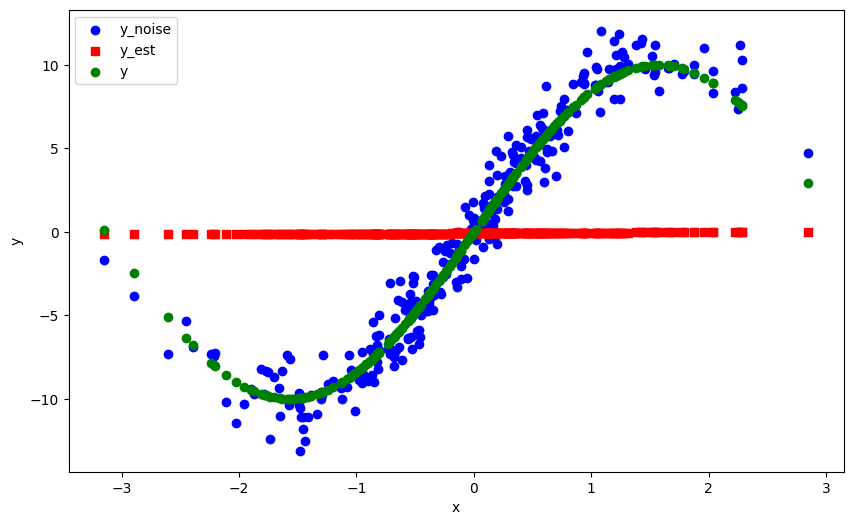

The programm is closed


In [3]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

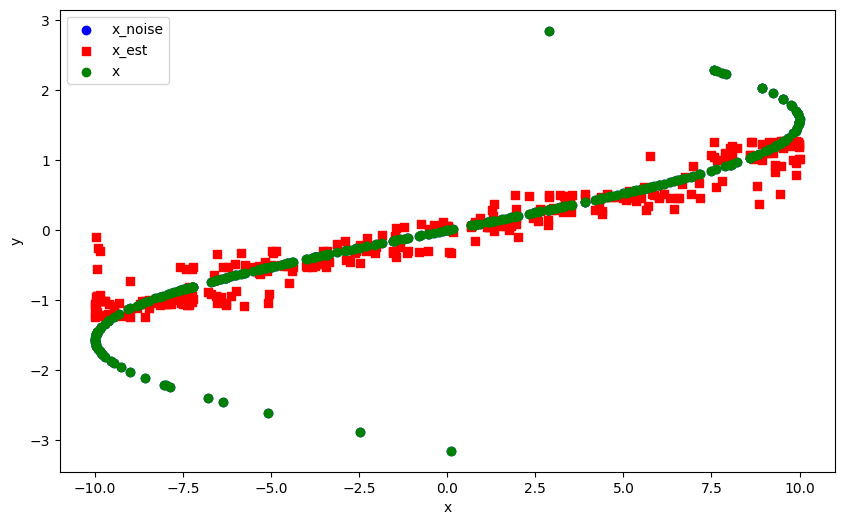

The programm is closed


In [4]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], X_true.detach().numpy()[:, 0], label='x_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Cov = 0

In [5]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
x1 = epsilon[:, 0]
x2 = 10*torch.sin(x1)
# Step 4: Combine these results into a new tensor of shape [n, 2]
x1_true = x1 #+ epsilon[:, 0]
x2_true = x2 + epsilon[:, 1]
X = torch.stack((x1, x2), dim=1)
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit()
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/23000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.1

Inner iteration 0
	h(W(model)): 0.010265602644517645
	score(model): 3.7922869812115563
	 mle: 37.523251267194524
	 mse: 18.82148120091363
	W1: tensor([[1.0000e-04, 1.1557e+00],
        [1.2399e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.010265581619989472
	structure loss: 2.1024528172250423e-08
	Sigma: tensor([[ 1.0000, -0.0125],
        [-0.0125,  1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9875246846683784


  0%|          | 2/23000.0 [00:12<40:01:42,  6.27s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.028423986718149566
	score(model): 0.24750746008617514
	 mle: 1.843464512739881
	 mse: 1.0794354169730447
	W1: tensor([[1.0000e-04, 7.1539e+00],
        [3.3192e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.028191221647730913
	structure loss: 0.0002327650704186529
	Sigma: tensor([[0.5718, 0.2133],
        [0.2133, 1.7232]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.53357552341047


  0%|          | 3/23000.0 [00:24<56:03:39,  8.78s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.027434203285313166
	score(model): 0.2469279834128475
	 mle: 1.8509166136760244
	 mse: 1.1074435823132684
	W1: tensor([[1.0000e-04, 7.1128e+00],
        [3.2713e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.027070406811869674
	structure loss: 0.0003637964734434923
	Sigma: tensor([[0.5760, 0.2682],
        [0.2682, 1.6067]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5104304089879785


  0%|          | 4/23000.0 [00:37<64:30:15, 10.10s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.027347962290237383
	score(model): 0.24694001287481016
	 mle: 1.8527611620675375
	 mse: 1.115360343420969
	W1: tensor([[1.0000e-04, 7.1007e+00],
        [3.2695e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02694872502520873
	structure loss: 0.000399237265028652
	Sigma: tensor([[0.5759, 0.2814],
        [0.2814, 1.6220]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5049833583869121


  0%|          | 5/23000.0 [00:49<69:27:08, 10.87s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.027341434416997497
	score(model): 0.24694120057348004
	 mle: 1.8529015807091849
	 mse: 1.1159725815571668
	W1: tensor([[1.0000e-04, 7.0998e+00],
        [3.2694e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02693944633487222
	structure loss: 0.00040198808212527776
	Sigma: tensor([[0.5759, 0.2824],
        [0.2824, 1.6232]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5045691405253542


  0%|          | 6/23000.0 [01:01<72:25:29, 11.34s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.027365577209141855
	score(model): 0.24695039421731307
	 mle: 1.8527606193345314
	 mse: 1.1159992769861484
	W1: tensor([[1.0000e-04, 7.0996e+00],
        [3.2709e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.026963331790804013
	structure loss: 0.0004022454183378425
	Sigma: tensor([[0.5758, 0.2825],
        [0.2825, 1.6234]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.504524650319025

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.05

Inner iteration 0
	h(W(model)): 0.5461086259802108
	score(model): 0.6954646678035048
	 mle: 2.679386030026486
	 mse: 1.8345020326543042
	W1: tensor([[1.0000e-04, 6.1345e+00],
        [1.7032e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.5458080815076052
	structure loss: 0.000300544472605635
	Sigma: tensor([[0.5758, 0.2825],
        [0.2825, 1.6234]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5045238316052928


  0%|          | 8/23000.0 [01:14<57:10:49,  8.95s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.0066179653476571496
	score(model): 0.13065616037476366
	 mle: 2.140127690886283
	 mse: 1.2429060033212698
	W1: tensor([[1.0000e-04, 7.0906e+00],
        [1.5413e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005971821306455016
	structure loss: 0.0006461440412021333
	Sigma: tensor([[0.7655, 0.3585],
        [0.3585, 1.6175]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6347216747634348


  0%|          | 9/23000.0 [01:26<62:04:20,  9.72s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.006533226669331561
	score(model): 0.1306365904107782
	 mle: 2.140480091339836
	 mse: 1.2347981070336762
	W1: tensor([[1.0000e-04, 7.1054e+00],
        [1.5319e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005923555366468047
	structure loss: 0.0006096713028635138
	Sigma: tensor([[0.7663, 0.3475],
        [0.3475, 1.6080]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6413364484216983


  0%|          | 10/23000.0 [01:38<65:42:56, 10.29s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.006527096369914965
	score(model): 0.13064297388094107
	 mle: 2.1407294962231074
	 mse: 1.234867706150342
	W1: tensor([[1.0000e-04, 7.1054e+00],
        [1.5310e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005917356786205197
	structure loss: 0.0006097395837097678
	Sigma: tensor([[0.7665, 0.3475],
        [0.3475, 1.6079]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6414904365765519


  0%|          | 11/23000.0 [01:50<68:41:20, 10.76s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.00652605326773495
	score(model): 0.13064510167225143
	 mle: 2.140793821715913
	 mse: 1.2348965072811753
	W1: tensor([[1.0000e-04, 7.1054e+00],
        [1.5309e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005916255248649804
	structure loss: 0.0006097980190851457
	Sigma: tensor([[0.7665, 0.3475],
        [0.3475, 1.6079]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6415232832716047


  0%|          | 12/23000.0 [02:02<70:37:25, 11.06s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.0065259296253444175
	score(model): 0.13064550852973103
	 mle: 2.140804644026673
	 mse: 1.2349021027342508
	W1: tensor([[1.0000e-04, 7.1054e+00],
        [1.5309e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005916118041861651
	structure loss: 0.0006098115834827665
	Sigma: tensor([[0.7665, 0.3475],
        [0.3475, 1.6079]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6415280524797566

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.025

Inner iteration 0
	h(W(model)): 0.31306180911977416
	score(model): 0.39275711005997005
	 mle: 2.882670436406829
	 mse: 1.9570794380822385
	W1: tensor([[1.0000e-04, 6.1693e+00],
        [1.2817e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.312601898662241
	structure loss: 0.0004599104575331858
	Sigma: tensor([[0.7665, 0.3475],
        [0.3475, 1.6079]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6415280536610533


  0%|          | 14/23000.0 [02:14<56:08:46,  8.79s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0018183850721536212
	score(model): 0.06725649737050127
	 mle: 2.270891127678918
	 mse: 1.2614918710996499
	W1: tensor([[1.0000e-04, 7.2082e+00],
        [7.3942e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0014203826781287177
	structure loss: 0.0003980023940249036
	Sigma: tensor([[0.8656, 0.2768],
        [0.2768, 1.5218]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7644413714180261


  0%|          | 15/23000.0 [02:27<62:23:47,  9.77s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0018486271660407096
	score(model): 0.06728339389863619
	 mle: 2.2720171634560424
	 mse: 1.271146790504097
	W1: tensor([[1.0000e-04, 7.1889e+00],
        [7.3785e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0014067933971024793
	structure loss: 0.00044183376893823035
	Sigma: tensor([[0.8627, 0.2924],
        [0.2924, 1.5376]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7536903554655617


  0%|          | 16/23000.0 [02:38<65:47:28, 10.30s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0018481184587741835
	score(model): 0.06728430193765154
	 mle: 2.27207405912135
	 mse: 1.2711672169841546
	W1: tensor([[1.0000e-04, 7.1889e+00],
        [7.3769e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0014061979667872038
	structure loss: 0.00044192049198697974
	Sigma: tensor([[0.8628, 0.2924],
        [0.2924, 1.5376]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7537169165436625


  0%|          | 17/23000.0 [02:50<68:26:09, 10.72s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0018604006934558768
	score(model): 0.06729687716826367
	 mle: 2.2721054847420232
	 mse: 1.2713161576395131
	W1: tensor([[1.0000e-04, 7.1885e+00],
        [7.4082e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0014180222820625588
	structure loss: 0.00044237841139331806
	Sigma: tensor([[0.8628, 0.2926],
        [0.2926, 1.5377]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7536068338722975


  0%|          | 18/23000.0 [03:02<70:21:45, 11.02s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0018512666475401069
	score(model): 0.06728771051410637
	 mle: 2.27208733945484
	 mse: 1.271190070407181
	W1: tensor([[1.0000e-04, 7.1889e+00],
        [7.3846e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0014091444637673867
	structure loss: 0.0004421221837727202
	Sigma: tensor([[0.8628, 0.2925],
        [0.2925, 1.5376]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7536680128105044

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.0125

Inner iteration 0
	h(W(model)): 0.7201767747790726
	score(model): 0.7600364394047575
	 mle: 2.872823734024606
	 mse: 1.8517671408827794
	W1: tensor([[1.0000e-04, 6.3734e+00],
        [1.8826e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.7198289723468605
	structure loss: 0.0003478024322121076
	Sigma: tensor([[0.8628, 0.2925],
        [0.2925, 1.5376]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7536691683516632


  0%|          | 20/23000.0 [03:14<56:12:58,  8.81s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0010087559004379025
	score(model): 0.03506751354549433
	 mle: 2.38709626968008
	 mse: 1.4080817163308346
	W1: tensor([[1.0000e-04, 7.0987e+00],
        [3.9555e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00039423466626065107
	structure loss: 0.0006145212341772514
	Sigma: tensor([[0.8655, 0.3492],
        [0.3492, 1.9594]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7635581592959628


  0%|          | 21/23000.0 [03:26<61:14:56,  9.60s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0006391462286160319
	score(model): 0.034483586936240734
	 mle: 2.360023015657867
	 mse: 1.3114212892368684
	W1: tensor([[1.0000e-04, 7.2571e+00],
        [3.6325e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00034748493516501
	structure loss: 0.00029166129345102186
	Sigma: tensor([[0.9061, 0.2353],
        [0.2353, 1.5124]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8255156099593173


  0%|          | 22/23000.0 [03:38<65:09:48, 10.21s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0006377853850271383
	score(model): 0.034483170956363614
	 mle: 2.3600647503916274
	 mse: 1.3111876584450444
	W1: tensor([[1.0000e-04, 7.2577e+00],
        [3.6313e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00034730618913059175
	structure loss: 0.00029047919589654655
	Sigma: tensor([[0.9063, 0.2348],
        [0.2348, 1.5121]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8259333057053724


  0%|          | 23/23000.0 [03:50<68:26:36, 10.72s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0006377603296944713
	score(model): 0.0344832260394693
	 mle: 2.3600709498309227
	 mse: 1.311187536939274
	W1: tensor([[1.0000e-04, 7.2577e+00],
        [3.6312e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00034729069818073555
	structure loss: 0.00029046963151373574
	Sigma: tensor([[0.9063, 0.2348],
        [0.2348, 1.5121]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8259400118834861


  0%|          | 24/23000.0 [04:02<70:40:06, 11.07s/it]


mu 0.0125

Inner iteration 5000
	h(W(model)): 0.0006380342984727643
	score(model): 0.034483653668890335
	 mle: 2.360082562946191
	 mse: 1.3112154183064386
	W1: tensor([[1.0000e-04, 7.2577e+00],
        [3.6313e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003473153610311641
	structure loss: 0.0002907189374416002
	Sigma: tensor([[0.9063, 0.2349],
        [0.2349, 1.5121]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8258538304973818


  0%|          | 25/23000.0 [04:15<72:58:05, 11.43s/it]


mu 0.0125

Inner iteration 6000
	h(W(model)): 0.0006523602126804706
	score(model): 0.03449681979211934
	 mle: 2.3599725566507277
	 mse: 1.3111364767829412
	W1: tensor([[1.0000e-04, 7.2581e+00],
        [3.7032e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00036123764595963337
	structure loss: 0.00029112256672083725
	Sigma: tensor([[0.9062, 0.2351],
        [0.2351, 1.5122]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8257049841899015


  0%|          | 26/23000.0 [04:28<76:41:26, 12.02s/it]


mu 0.0125

Inner iteration 7000
	h(W(model)): 0.0006539052128267417
	score(model): 0.034497629573556336
	 mle: 2.3598674829655826
	 mse: 1.3109073635057766
	W1: tensor([[1.0000e-04, 7.2589e+00],
        [3.7114e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00036292363430634467
	structure loss: 0.000290981578520397
	Sigma: tensor([[0.9062, 0.2350],
        [0.2350, 1.5122]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8257719742338503


  0%|          | 27/23000.0 [04:40<66:19:51, 10.39s/it]


mu 0.0125

Inner iteration 7999
	h(W(model)): 0.0006463015317709717
	score(model): 0.03448953518860469
	 mle: 2.3598672038567137
	 mse: 1.311053262964985
	W1: tensor([[1.0000e-04, 7.2582e+00],
        [3.6721e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00035520024813040507
	structure loss: 0.00029110128364056664
	Sigma: tensor([[0.9062, 0.2351],
        [0.2351, 1.5122]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8257068900088139
final_W1:  tensor([[1.0000e-04, 7.2582e+00],
        [3.6721e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.9062, 0.2351],
        [0.2351, 1.5122]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[1.0085457  0.05222897]
 [0.05222897 1.46176352]]
estimated Sigma:  [[0.90619737 0.23506728]
 [0.23506728 1.51219942]]


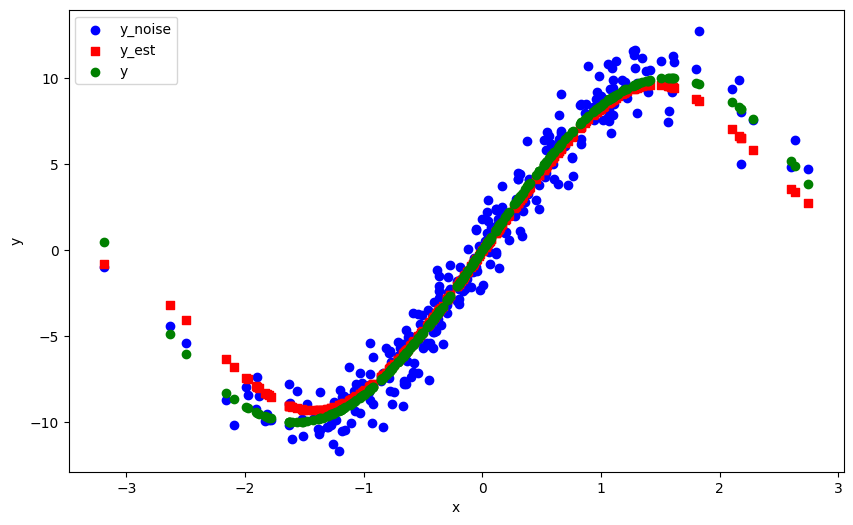

The programm is closed


In [6]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

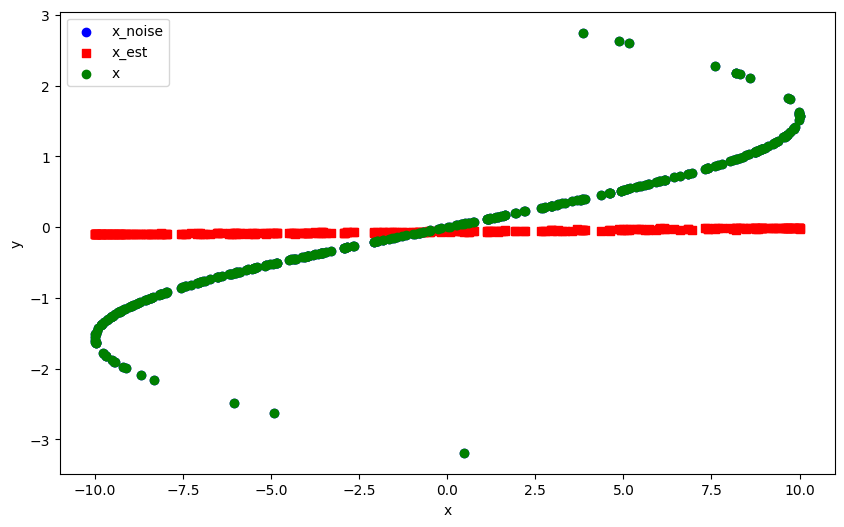

The programm is closed


In [7]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], X_true.detach().numpy()[:, 0], label='x_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Cov = 0.6 

In [8]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0.6],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.6, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
x1 = epsilon[:, 0]
x2 = 10*torch.sin(x1)
# Step 4: Combine these results into a new tensor of shape [n, 2]
x1_true = x1 #+ epsilon[:, 0]
x2_true = x2 + epsilon[:, 1]
X = torch.stack((x1, x2), dim=1)
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit()
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/23000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.1

Inner iteration 0
	h(W(model)): 0.012865300740828952
	score(model): 4.46536637116895
	 mle: 44.18278073561161
	 mse: 22.271003981698858
	W1: tensor([[1.0000e-04, 1.1737e+00],
        [1.3666e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.012865294691986051
	structure loss: 6.048842900521767e-09
	Sigma: tensor([[1.0000, 0.0066],
        [0.0066, 1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.993418263090636


  0%|          | 2/23000.0 [00:13<43:30:54,  6.81s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.026467354383985058
	score(model): 0.23348035900728528
	 mle: 1.6738386818337956
	 mse: 0.9162500483788738
	W1: tensor([[1.0000e-04, 7.9528e+00],
        [2.8783e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.026199320312207952
	structure loss: 0.0002680340717771054
	Sigma: tensor([[0.6180, 0.2059],
        [0.2059, 1.5261]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5734993001640509


  0%|          | 3/23000.0 [00:26<59:59:10,  9.39s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.025653577240636778
	score(model): 0.22911288909289837
	 mle: 1.6384736874747436
	 mse: 0.9197113919578717
	W1: tensor([[1.0000e-04, 7.9620e+00],
        [2.8248e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.025293273485671453
	structure loss: 0.0003603037549653257
	Sigma: tensor([[0.6275, 0.2384],
        [0.2384, 1.1936]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5405173838450279


  0%|          | 4/23000.0 [00:39<68:29:25, 10.72s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.025701406270596205
	score(model): 0.2290369726836778
	 mle: 1.6370587400632928
	 mse: 0.9179688523422528
	W1: tensor([[1.0000e-04, 7.9632e+00],
        [2.8276e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02535006836573972
	structure loss: 0.00035133790485648506
	Sigma: tensor([[0.6272, 0.2354],
        [0.2354, 1.1924]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5419897659205651


  0%|          | 5/23000.0 [00:52<72:34:31, 11.36s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.02570627895609353
	score(model): 0.22903127000240556
	 mle: 1.6369323450450404
	 mse: 0.9177943729249891
	W1: tensor([[1.0000e-04, 7.9634e+00],
        [2.8278e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02535586241297727
	structure loss: 0.0003504165431162595
	Sigma: tensor([[0.6271, 0.2351],
        [0.2351, 1.1921]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5421233565307894


  0%|          | 6/23000.0 [01:04<75:00:40, 11.74s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.02570639885362006
	score(model): 0.22903105207801439
	 mle: 1.636928585177842
	 mse: 0.9177914228222506
	W1: tensor([[1.0000e-04, 7.9634e+00],
        [2.8278e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.025355992418899742
	structure loss: 0.0003504064347203163
	Sigma: tensor([[0.6271, 0.2351],
        [0.2351, 1.1921]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5421232771210897

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.05

Inner iteration 0
	h(W(model)): 0.4254673479214135
	score(model): 0.5702568793069286
	 mle: 2.5387271545977526
	 mse: 1.5307846252005997
	W1: tensor([[1.0000e-04, 6.9497e+00],
        [1.3269e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.4252003829755675
	structure loss: 0.0002669649458459933
	Sigma: tensor([[0.6271, 0.2351],
        [0.2351, 1.1921]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5421233255291161


  0%|          | 8/23000.0 [01:16<57:31:15,  9.01s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.006067229975280599
	score(model): 0.12159711571429375
	 mle: 1.9161229330945397
	 mse: 1.037411370140307
	W1: tensor([[1.0000e-04, 7.9759e+00],
        [1.3205e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005546562442510616
	structure loss: 0.0005206675327699825
	Sigma: tensor([[0.8176, 0.2861],
        [0.2861, 1.1951]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6636141407861247


  0%|          | 9/23000.0 [01:29<62:47:52,  9.83s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.006070913057124701
	score(model): 0.12163098612980272
	 mle: 1.9174922530999006
	 mse: 1.0432660270708016
	W1: tensor([[1.0000e-04, 7.9655e+00],
        [1.3170e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005502397383567281
	structure loss: 0.0005685156735574194
	Sigma: tensor([[0.8168, 0.2993],
        [0.2993, 1.2087]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6549578621502921


  0%|          | 10/23000.0 [01:42<68:26:14, 10.72s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.00606341462651527
	score(model): 0.12163847598573459
	 mle: 1.9177897960641968
	 mse: 1.0433501614702247
	W1: tensor([[1.0000e-04, 7.9656e+00],
        [1.3161e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00549502751734865
	structure loss: 0.0005683871091666202
	Sigma: tensor([[0.8170, 0.2993],
        [0.2993, 1.2086]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.655164634670957


  0%|          | 11/23000.0 [01:55<72:33:15, 11.36s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.006061872191391886
	score(model): 0.12164068750854966
	 mle: 1.917866056069856
	 mse: 1.0433836801152987
	W1: tensor([[1.0000e-04, 7.9656e+00],
        [1.3159e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0054934337393617305
	structure loss: 0.0005684384520301556
	Sigma: tensor([[0.8171, 0.2993],
        [0.2993, 1.2086]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6552009165992324


  0%|          | 12/23000.0 [02:07<74:05:22, 11.60s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.006082905099588558
	score(model): 0.12165509889231105
	 mle: 1.9177182452405714
	 mse: 1.0433388929291203
	W1: tensor([[1.0000e-04, 7.9659e+00],
        [1.3182e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005513509991503351
	structure loss: 0.0005693951080852069
	Sigma: tensor([[0.8171, 0.2995],
        [0.2995, 1.2088]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6550285481544625

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.025

Inner iteration 0
	h(W(model)): 0.7679111622205733
	score(model): 0.8437302406462941
	 mle: 2.673974925482846
	 mse: 1.6378094051204988
	W1: tensor([[1.0000e-04, 7.0307e+00],
        [1.7622e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.767467332174995
	structure loss: 0.0004438300455783528
	Sigma: tensor([[0.8171, 0.2996],
        [0.2996, 1.2088]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6550287121890057


  0%|          | 14/23000.0 [02:19<58:19:51,  9.14s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.002000345760310794
	score(model): 0.06297923507370656
	 mle: 2.047001390480192
	 mse: 1.1221344588837758
	W1: tensor([[1.0000e-04, 7.9729e+00],
        [6.4653e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001328589801556479
	structure loss: 0.0006717559587543151
	Sigma: tensor([[0.8920, 0.3251],
        [0.3251, 1.2026]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6870095739104002


  0%|          | 15/23000.0 [02:31<63:02:33,  9.87s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.001757101991258063
	score(model): 0.06283186600839968
	 mle: 2.0469354531135906
	 mse: 1.095499076386969
	W1: tensor([[1.0000e-04, 8.0300e+00],
        [6.3632e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0013054371273963916
	structure loss: 0.0004516648638616715
	Sigma: tensor([[0.9065, 0.2647],
        [0.2647, 1.1838]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7464142649346805


  0%|          | 16/23000.0 [02:44<66:48:57, 10.47s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0017537974113199704
	score(model): 0.06283204920150945
	 mle: 2.0470460544288893
	 mse: 1.095348731597372
	W1: tensor([[1.0000e-04, 8.0305e+00],
        [6.3587e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001303755354144176
	structure loss: 0.00045004205717579437
	Sigma: tensor([[0.9068, 0.2642],
        [0.2642, 1.1833]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7468634515127588


  0%|          | 17/23000.0 [02:56<69:52:47, 10.95s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0017533548289715166
	score(model): 0.06283241386902046
	 mle: 2.047078459056059
	 mse: 1.0953630211240644
	W1: tensor([[1.0000e-04, 8.0305e+00],
        [6.3576e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001303305432461599
	structure loss: 0.0004500493965099177
	Sigma: tensor([[0.9068, 0.2642],
        [0.2642, 1.1833]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7468820753542624


  0%|          | 18/23000.0 [03:08<72:11:15, 11.31s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0017532494868695045
	score(model): 0.06283249077199497
	 mle: 2.0470847168414696
	 mse: 1.0953602689256587
	W1: tensor([[1.0000e-04, 8.0305e+00],
        [6.3574e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001303232968589807
	structure loss: 0.0004500165182796975
	Sigma: tensor([[0.9068, 0.2642],
        [0.2642, 1.1833]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7468948003524357

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.0125

Inner iteration 0
	h(W(model)): 0.6462761824808565
	score(model): 0.6850096046817163
	 mle: 2.7335731931962117
	 mse: 1.6256467524400549
	W1: tensor([[1.0000e-04, 7.2037e+00],
        [1.5778e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.6459138891920087
	structure loss: 0.00036229328884784806
	Sigma: tensor([[0.9068, 0.2642],
        [0.2642, 1.1833]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7468950567149402


  0%|          | 20/23000.0 [03:21<58:02:24,  9.09s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.0008267965977648618
	score(model): 0.03268563239517754
	 mle: 2.156322197074501
	 mse: 1.1872255617948069
	W1: tensor([[1.0000e-04, 8.0224e+00],
        [3.2538e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003407060197959666
	structure loss: 0.0004860905779688952
	Sigma: tensor([[0.9219, 0.2748],
        [0.2748, 1.3568]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7889229137395708


  0%|          | 21/23000.0 [03:33<63:23:44,  9.93s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0006609390006623507
	score(model): 0.03235931664402518
	 mle: 2.1386984556954696
	 mse: 1.1461755449288422
	W1: tensor([[1.0000e-04, 8.0879e+00],
        [3.1418e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003228650052258253
	structure loss: 0.00033807399543652546
	Sigma: tensor([[0.9396, 0.2273],
        [0.2273, 1.1937]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8062513530465133


  0%|          | 22/23000.0 [03:46<67:40:56, 10.60s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0006593168625171329
	score(model): 0.032358155750661595
	 mle: 2.1387039410389046
	 mse: 1.1459553187048888
	W1: tensor([[1.0000e-04, 8.0883e+00],
        [3.1386e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00032225347925374237
	structure loss: 0.0003370633832633905
	Sigma: tensor([[0.9398, 0.2270],
        [0.2270, 1.1927]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8064331361577893


  0%|          | 23/23000.0 [03:59<71:31:01, 11.21s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.0006591807647531877
	score(model): 0.03235827334005276
	 mle: 2.1387244159098704
	 mse: 1.1459645728897605
	W1: tensor([[1.0000e-04, 8.0884e+00],
        [3.1380e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00032211654004399293
	structure loss: 0.0003370642247091948
	Sigma: tensor([[0.9398, 0.2270],
        [0.2270, 1.1927]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8064470222841204


  0%|          | 24/23000.0 [04:11<74:01:58, 11.60s/it]


mu 0.0125

Inner iteration 5000
	h(W(model)): 0.0006591652834197527
	score(model): 0.03235828877850984
	 mle: 2.1387268744186945
	 mse: 1.145965520594098
	W1: tensor([[1.0000e-04, 8.0884e+00],
        [3.1379e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00032210184709224876
	structure loss: 0.00033706343632750393
	Sigma: tensor([[0.9398, 0.2270],
        [0.2270, 1.1927]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8064488982137468


  0%|          | 25/23000.0 [04:24<75:43:53, 11.87s/it]


mu 0.0125

Inner iteration 6000
	h(W(model)): 0.0006939944661740812
	score(model): 0.03239021138662079
	 mle: 2.1384511760714533
	 mse: 1.145834061305179
	W1: tensor([[1.0000e-04, 8.0892e+00],
        [3.2979e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00035584875509986347
	structure loss: 0.0003381457110742177
	Sigma: tensor([[0.9397, 0.2273],
        [0.2273, 1.1929]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8061097327221479


  0%|          | 26/23000.0 [04:36<77:01:59, 12.07s/it]


mu 0.0125

Inner iteration 7000
	h(W(model)): 0.0006704386489558539
	score(model): 0.032371241407537416
	 mle: 2.1389878886910503
	 mse: 1.1464937611083972
	W1: tensor([[1.0000e-04, 8.0859e+00],
        [3.1915e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00033300253316337347
	structure loss: 0.0003374361157924804
	Sigma: tensor([[0.9398, 0.2272],
        [0.2272, 1.1928]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8062461839602929


  0%|          | 27/23000.0 [04:49<68:24:02, 10.72s/it]


mu 0.0125

Inner iteration 7999
	h(W(model)): 0.0006820433422015481
	score(model): 0.032382163288424276
	 mle: 2.1388641638400805
	 mse: 1.146151594342251
	W1: tensor([[1.0000e-04, 8.0869e+00],
        [3.2512e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00034565724085622307
	structure loss: 0.0003363861013453251
	Sigma: tensor([[0.9399, 0.2268],
        [0.2268, 1.1926]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8066216641051842
final_W1:  tensor([[1.0000e-04, 8.0869e+00],
        [3.2512e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.9399, 0.2268],
        [0.2268, 1.1926]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[1.05180082 0.72394676]
 [0.72394676 1.59874297]]
estimated Sigma:  [[0.93987813 0.22681659]
 [0.22681659 1.19260032]]


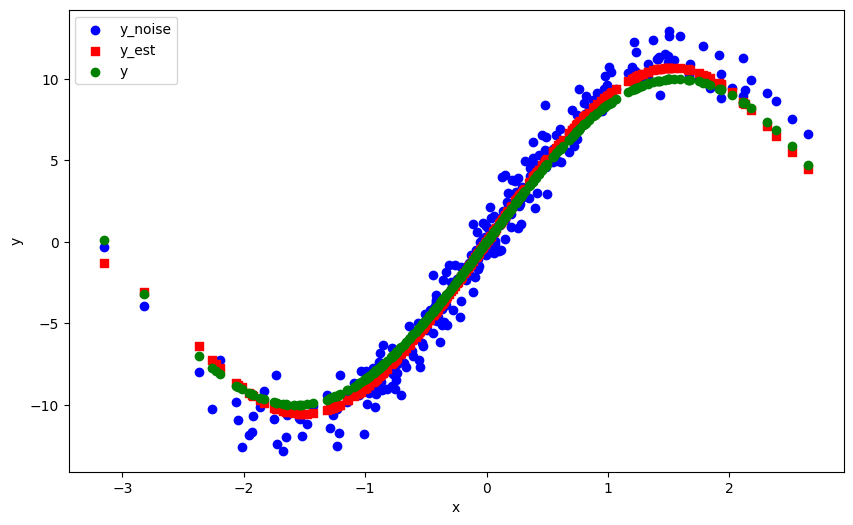

The programm is closed


In [9]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

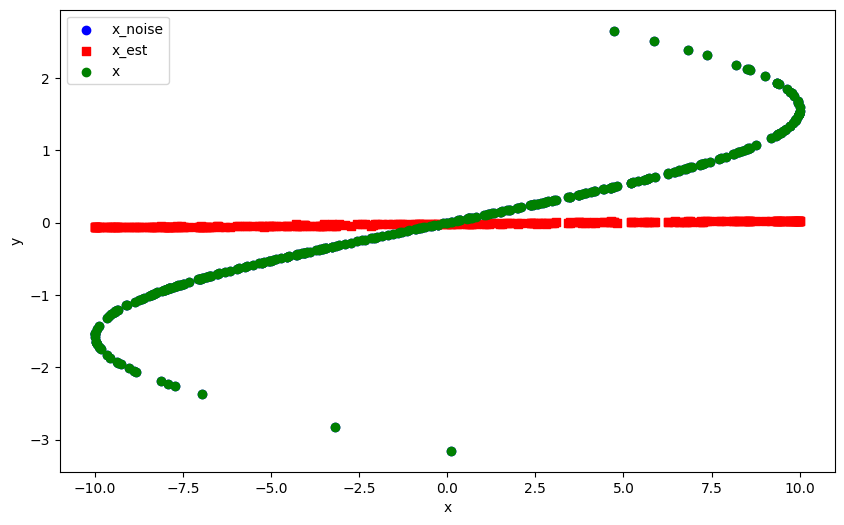

The programm is closed


In [10]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], X_true.detach().numpy()[:, 0], label='x_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# Prefer X1 <--> X2 than X1 --> X2

In [11]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0.6],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.6, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
x1 = epsilon[:, 0]
x2 = epsilon[:, 1]
# Step 4: Combine these results into a new tensor of shape [n, 2]
x1_true = x1 #+ epsilon[:, 0]
x2_true = x2 #+ epsilon[:, 1]
X = torch.stack((x1, x2), dim=1)
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit()
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/23000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.1

Inner iteration 0
	h(W(model)): 0.5731012423186648
	score(model): 0.8174750637463366
	 mle: 2.3548803558915634
	 mse: 1.1847211143487797
	W1: tensor([[1.0000e-04, 1.1155e+00],
        [9.5979e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.5731012071238109
	structure loss: 3.519485392011745e-08
	Sigma: tensor([[ 1.0000, -0.0127],
        [-0.0127,  1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9872513040354933


  0%|          | 2/23000.0 [00:13<43:49:18,  6.86s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.032325396532900195
	score(model): 0.1826648879663163
	 mle: 1.4558312932833135
	 mse: 0.940996794390236
	W1: tensor([[1.0000e-04, 7.7873e-01],
        [3.2642e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.03230736022816494
	structure loss: 1.8036304735256914e-05
	Sigma: tensor([[ 0.7323, -0.5030],
        [-0.5030,  1.1394]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.39325645904903667


  0%|          | 3/23000.0 [00:26<60:18:53,  9.44s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.031088282225270672
	score(model): 0.18268914378863588
	 mle: 1.4693647447614717
	 mse: 0.9377871003911841
	W1: tensor([[1.0000e-04, 7.6013e-01],
        [3.2795e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.03107204434448052
	structure loss: 1.6237880790151427e-05
	Sigma: tensor([[ 0.7287, -0.4868],
        [-0.4868,  1.1310]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.40314555129867563


  0%|          | 4/23000.0 [00:39<68:43:51, 10.76s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.03109376715281107
	score(model): 0.18268161017977344
	 mle: 1.4692658568493075
	 mse: 0.9376969445347259
	W1: tensor([[1.0000e-04, 7.5969e-01],
        [3.2817e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.031077547808191497
	structure loss: 1.6219344619573806e-05
	Sigma: tensor([[ 0.7286, -0.4867],
        [-0.4867,  1.1309]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4031505546655213


  0%|          | 5/23000.0 [00:53<75:02:37, 11.75s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.03109427228461739
	score(model): 0.18268106973203777
	 mle: 1.4692554776962925
	 mse: 0.9376969082034411
	W1: tensor([[1.0000e-04, 7.5969e-01],
        [3.2817e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.03107805241662387
	structure loss: 1.6219867993522152e-05
	Sigma: tensor([[ 0.7286, -0.4867],
        [-0.4867,  1.1309]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.40314501900456673


  0%|          | 6/23000.0 [01:06<78:28:27, 12.29s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.031094290321905325
	score(model): 0.1826810442175869
	 mle: 1.469254991517206
	 mse: 0.9376971369567321
	W1: tensor([[1.0000e-04, 7.5970e-01],
        [3.2817e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.031078070368588673
	structure loss: 1.6219953316652658e-05
	Sigma: tensor([[ 0.7286, -0.4867],
        [-0.4867,  1.1309]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4031445777674673

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.05

Inner iteration 0
	h(W(model)): 0.34771259018489054
	score(model): 0.5868312193489746
	 mle: 4.667865635551858
	 mse: 1.3924313374769672
	W1: tensor([[1.0000e-04, 9.4701e-01],
        [8.8053e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.34767298578786265
	structure loss: 3.960439702788143e-05
	Sigma: tensor([[ 0.7286, -0.4867],
        [-0.4867,  1.1309]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4031445777315976


  0%|          | 8/23000.0 [01:19<60:15:35,  9.44s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.0045484404691291174
	score(model): 0.09890323888232289
	 mle: 1.8596361886988129
	 mse: 0.9564580493088598
	W1: tensor([[1.0000e-04, 4.4684e-01],
        [2.1344e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004548144796627351
	structure loss: 2.95672501766063e-07
	Sigma: tensor([[ 0.7809, -0.1098],
        [-0.1098,  1.1386]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7499050593901161


  0%|          | 9/23000.0 [01:32<65:19:18, 10.23s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.004571576932856007
	score(model): 0.09890815767929934
	 mle: 1.8590642226735368
	 mse: 0.9561925010056026
	W1: tensor([[1.0000e-04, 4.5466e-01],
        [2.1030e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0045712847299692605
	structure loss: 2.922028867462928e-07
	Sigma: tensor([[ 0.7789, -0.1079],
        [-0.1079,  1.1330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7486167845282586


  0%|          | 10/23000.0 [01:44<69:00:51, 10.81s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.0045697202216175925
	score(model): 0.09890892148774193
	 mle: 1.8591181736763314
	 mse: 0.9562084895413836
	W1: tensor([[1.0000e-04, 4.5455e-01],
        [2.1031e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0045694287180979565
	structure loss: 2.9150351963606186e-07
	Sigma: tensor([[ 0.7789, -0.1078],
        [-0.1078,  1.1330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7486912946236921


  0%|          | 11/23000.0 [01:57<72:37:28, 11.37s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.004569728767081424
	score(model): 0.0989089359107073
	 mle: 1.8591181996338249
	 mse: 0.9562084452403088
	W1: tensor([[1.0000e-04, 4.5455e-01],
        [2.1031e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004569437255420361
	structure loss: 2.915116610628307e-07
	Sigma: tensor([[ 0.7789, -0.1078],
        [-0.1078,  1.1330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7486911862521545


  0%|          | 12/23000.0 [02:10<75:03:35, 11.75s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.004569728793597904
	score(model): 0.09890893602219408
	 mle: 1.8591182002507398
	 mse: 0.9562084446601936
	W1: tensor([[1.0000e-04, 4.5455e-01],
        [2.1031e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004569437281868094
	structure loss: 2.9151172980992207e-07
	Sigma: tensor([[ 0.7789, -0.1078],
        [-0.1078,  1.1330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7486911887616445

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.025

Inner iteration 0
	h(W(model)): 0.3428415758232866
	score(model): 0.4362582592279549
	 mle: 3.6429800143222844
	 mse: 1.6589840014965027
	W1: tensor([[1.0000e-04, 9.5339e-01],
        [8.6854e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.34283964287601076
	structure loss: 1.932947275851138e-06
	Sigma: tensor([[ 0.7789, -0.1078],
        [-0.1078,  1.1330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.74869118876088

  0%|          | 14/23000.0 [02:23<60:37:04,  9.49s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.001026784965600118
	score(model): 0.05076253614227453
	 mle: 1.9701835750049557
	 mse: 1.0055818169598878
	W1: tensor([[1.0000e-04, 3.3207e-01],
        [1.3646e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001026704289283309
	structure loss: 8.067631680915531e-08
	Sigma: tensor([[0.8320, 0.0791],
        [0.0791, 1.1788]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8148416236175862


  0%|          | 15/23000.0 [02:36<65:57:23, 10.33s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0009935225140838635
	score(model): 0.05076158980662502
	 mle: 1.9717173878210699
	 mse: 1.0070784811305498
	W1: tensor([[1.0000e-04, 3.2607e-01],
        [1.3670e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0009934348272295779
	structure loss: 8.768685428564744e-08
	Sigma: tensor([[0.8307, 0.0838],
        [0.0838, 1.1793]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8116121068439953


  0%|          | 16/23000.0 [02:49<70:37:14, 11.06s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0009936085594139268
	score(model): 0.05076161278830136
	 mle: 1.9717150810698507
	 mse: 1.0070773161946625
	W1: tensor([[1.0000e-04, 3.2606e-01],
        [1.3671e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0009935209028171244
	structure loss: 8.76565968024965e-08
	Sigma: tensor([[0.8307, 0.0837],
        [0.0837, 1.1793]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8116227993627192


  0%|          | 17/23000.0 [03:03<74:55:39, 11.74s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0009936091054724891
	score(model): 0.050761614952075505
	 mle: 1.971715245541866
	 mse: 1.0070777041759131
	W1: tensor([[1.0000e-04, 3.2606e-01],
        [1.3671e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0009935214486103128
	structure loss: 8.765686217637389e-08
	Sigma: tensor([[0.8307, 0.0837],
        [0.0837, 1.1793]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.811621593645476


  0%|          | 18/23000.0 [03:15<76:51:28, 12.04s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0009936091280227917
	score(model): 0.0507616150508229
	 mle: 1.9717152492526413
	 mse: 1.0070777089275833
	W1: tensor([[1.0000e-04, 3.2606e-01],
        [1.3671e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000993521471162051
	structure loss: 8.765686074067337e-08
	Sigma: tensor([[0.8307, 0.0837],
        [0.0837, 1.1793]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8116215847930305

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.0125

Inner iteration 0
	h(W(model)): 0.4409161309640345
	score(model): 0.4849533197707915
	 mle: 3.4296907513887964
	 mse: 1.8358684878054186
	W1: tensor([[1.0000e-04, 9.7552e-01],
        [9.6262e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.4409148138507937
	structure loss: 1.3171132408063002e-06
	Sigma: tensor([[0.8307, 0.0837],
        [0.0837, 1.1793]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8116215847928318


  0%|          | 20/23000.0 [03:28<60:51:34,  9.53s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00027947837112147003
	score(model): 0.025676163316938717
	 mle: 2.0162105098447145
	 mse: 1.0390564800594613
	W1: tensor([[1.0000e-04, 3.0196e-01],
        [7.8254e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002792014912493812
	structure loss: 2.768798720888255e-07
	Sigma: tensor([[0.8820, 0.1687],
        [0.1687, 1.1861]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8069614829057085


  0%|          | 21/23000.0 [03:41<65:09:59, 10.21s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.00027609778306308735
	score(model): 0.02568651151778325
	 mle: 2.0164977759506817
	 mse: 1.0345910387522979
	W1: tensor([[1.0000e-04, 3.2737e-01],
        [7.1748e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00027586873337215323
	structure loss: 2.2904969093412095e-07
	Sigma: tensor([[0.8848, 0.1428],
        [0.1428, 1.1655]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8249356161734416


  0%|          | 22/23000.0 [03:53<68:22:55, 10.71s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0002759928668035626
	score(model): 0.025687218446827313
	 mle: 2.0164911947419313
	 mse: 1.0342438369772393
	W1: tensor([[1.0000e-04, 3.2963e-01],
        [7.1243e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002757646161617444
	structure loss: 2.282506418181847e-07
	Sigma: tensor([[0.8853, 0.1417],
        [0.1417, 1.1646]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8259854233567019


  0%|          | 23/23000.0 [04:05<70:51:15, 11.10s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00027597666593752066
	score(model): 0.025687267954102644
	 mle: 2.0164944122687087
	 mse: 1.0342345308358134
	W1: tensor([[1.0000e-04, 3.2971e-01],
        [7.1224e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00027574843192601506
	structure loss: 2.2823401150560627e-07
	Sigma: tensor([[0.8853, 0.1416],
        [0.1416, 1.1646]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8260215050452202


  0%|          | 24/23000.0 [04:17<72:46:56, 11.40s/it]


mu 0.0125

Inner iteration 5000
	h(W(model)): 0.0002759760933138729
	score(model): 0.025687269397876123
	 mle: 2.0164945404930505
	 mse: 1.0342344550796663
	W1: tensor([[1.0000e-04, 3.2971e-01],
        [7.1224e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002757478590944551
	structure loss: 2.282342194177985e-07
	Sigma: tensor([[0.8853, 0.1416],
        [0.1416, 1.1646]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8260220054898264


  0%|          | 25/23000.0 [04:29<74:21:35, 11.65s/it]


mu 0.0125

Inner iteration 6000
	h(W(model)): 0.0002759760934282431
	score(model): 0.02568726940104033
	 mle: 2.0164945406852643
	 mse: 1.0342344548505698
	W1: tensor([[1.0000e-04, 3.2971e-01],
        [7.1224e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002757478592094742
	structure loss: 2.282342187689035e-07
	Sigma: tensor([[0.8853, 0.1416],
        [0.1416, 1.1646]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8260220066011831


  0%|          | 26/23000.0 [04:42<75:19:26, 11.80s/it]


mu 0.0125

Inner iteration 7000
	h(W(model)): 0.0002759760934144818
	score(model): 0.02568726940108805
	 mle: 2.0164945406892536
	 mse: 1.0342344548484859
	W1: tensor([[1.0000e-04, 3.2971e-01],
        [7.1224e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00027574785919570743
	structure loss: 2.2823421877437872e-07
	Sigma: tensor([[0.8853, 0.1416],
        [0.1416, 1.1646]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8260220066158859


  0%|          | 27/23000.0 [04:54<69:32:42, 10.90s/it]


mu 0.0125

Inner iteration 7999
	h(W(model)): 0.00027597609341448187
	score(model): 0.025687269401088227
	 mle: 2.0164945406892656
	 mse: 1.0342344548484836
	W1: tensor([[1.0000e-04, 3.2971e-01],
        [7.1224e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00027574785919570743
	structure loss: 2.2823421877443293e-07
	Sigma: tensor([[0.8853, 0.1416],
        [0.1416, 1.1646]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8260220066159161
final_W1:  tensor([[1.0000e-04, 3.2971e-01],
        [7.1224e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.8853, 0.1416],
        [0.1416, 1.1646]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[0.95503085 0.57671213]
 [0.57671213 1.47176963]]
estimated Sigma:  [[0.88527309 0.14163045]
 [0.14163045 1.16456746]]


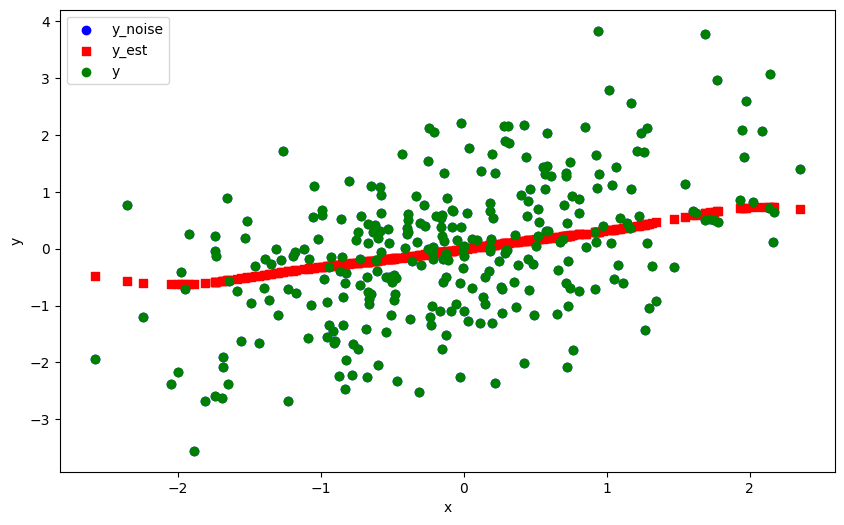

The programm is closed


In [12]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

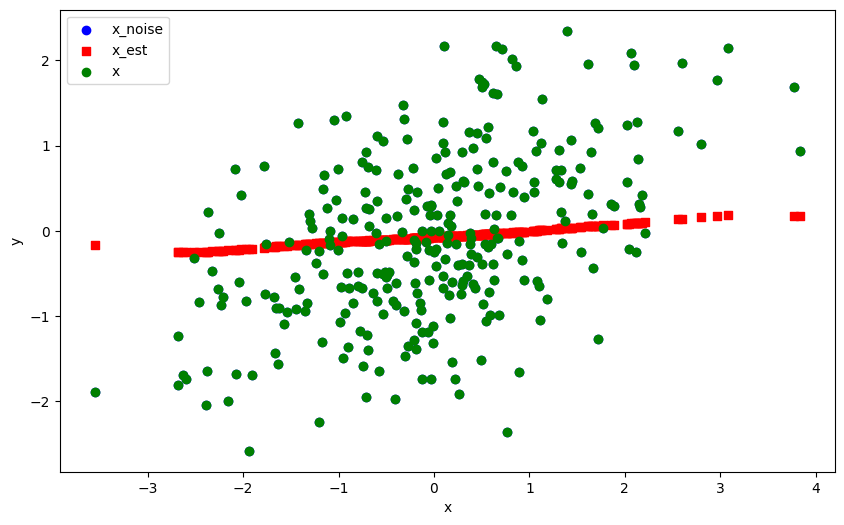

The programm is closed


In [13]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], X_true.detach().numpy()[:, 0], label='x_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

## Cov = 0

In [14]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0.0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.0, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
x1 = epsilon[:, 0]
x2 = epsilon[:, 1]
# Step 4: Combine these results into a new tensor of shape [n, 2]
x1_true = x1 #+ epsilon[:, 0]
x2_true = x2 #+ epsilon[:, 1]
X = torch.stack((x1, x2), dim=1)
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit()
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/23000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.1

Inner iteration 0
	h(W(model)): 0.34214506623656993
	score(model): 0.6851937583606609
	 mle: 3.3417756001900423
	 mse: 1.6839451198484263
	W1: tensor([[1.0000e-04, 1.2060e+00],
        [6.8593e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.34214503959540155
	structure loss: 2.664116838246855e-08
	Sigma: tensor([[ 1.0000, -0.0118],
        [-0.0118,  1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9882354827279789


  0%|          | 2/23000.0 [00:12<40:38:52,  6.36s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.032644246232697946
	score(model): 0.21795484362540296
	 mle: 1.8087163849900458
	 mse: 1.5264591258597457
	W1: tensor([[1.0000e-04, 5.8340e-01],
        [4.3749e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.032570451064708905
	structure loss: 7.379516798904084e-05
	Sigma: tensor([[ 1.2580, -1.1780],
        [-1.1780,  1.7460]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.29896520409630445


  0%|          | 3/23000.0 [00:25<57:13:08,  8.96s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.029226051561425874
	score(model): 0.2181712865703688
	 mle: 1.8467682434849435
	 mse: 1.5078914024939885
	W1: tensor([[1.0000e-04, 5.5168e-01],
        [4.3778e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.029164406727074432
	structure loss: 6.164483435144169e-05
	Sigma: tensor([[ 1.2366, -1.1148],
        [-1.1148,  1.6821]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.32252895259171316


  0%|          | 4/23000.0 [00:39<68:33:03, 10.73s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.029255544352433018
	score(model): 0.21816254154649634
	 mle: 1.846372270105581
	 mse: 1.508089383057771
	W1: tensor([[1.0000e-04, 5.5216e-01],
        [4.3761e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02919379653443599
	structure loss: 6.174781799702864e-05
	Sigma: tensor([[ 1.2366, -1.1153],
        [-1.1153,  1.6829]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.3223217798324027


  0%|          | 5/23000.0 [00:51<72:41:25, 11.38s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.02925598003130975
	score(model): 0.2181623730654817
	 mle: 1.846366049229951
	 mse: 1.5080921016693543
	W1: tensor([[1.0000e-04, 5.5217e-01],
        [4.3762e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02919423115786257
	structure loss: 6.174887344717953e-05
	Sigma: tensor([[ 1.2366, -1.1153],
        [-1.1153,  1.6829]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.3223185012067644


  0%|          | 6/23000.0 [01:04<75:20:17, 11.80s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.029255981057638027
	score(model): 0.2181623727669362
	 mle: 1.8463660355357134
	 mse: 1.5080921089455017
	W1: tensor([[1.0000e-04, 5.5217e-01],
        [4.3762e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.029194232181008584
	structure loss: 6.1748876629443e-05
	Sigma: tensor([[ 1.2366, -1.1153],
        [-1.1153,  1.6829]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.32231849311823885

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.05

Inner iteration 0
	h(W(model)): 0.2736927103832722
	score(model): 0.5294158529163356
	 mle: 5.00347722773484
	 mse: 1.4965511359082826
	W1: tensor([[1.0000e-04, 9.7094e-01],
        [7.6173e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.27350326202405784
	structure loss: 0.00018944835921436143
	Sigma: tensor([[ 1.2366, -1.1153],
        [-1.1153,  1.6829]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.32231849312711386


  0%|          | 8/23000.0 [01:17<58:31:47,  9.16s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.0036649547414292333
	score(model): 0.11685128984242331
	 mle: 2.239497851811186
	 mse: 1.3225441690416657
	W1: tensor([[1.0000e-04, 2.9718e-01],
        [2.8784e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0036584723726704738
	structure loss: 6.482368758759568e-06
	Sigma: tensor([[ 1.0888, -0.6154],
        [-0.6154,  1.4814]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6391635911297823


  0%|          | 9/23000.0 [01:30<65:24:33, 10.24s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.003557663115858327
	score(model): 0.11690071710549269
	 mle: 2.2428075439113866
	 mse: 1.3210642235305428
	W1: tensor([[1.0000e-04, 2.9976e-01],
        [2.8116e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00355144297753629
	structure loss: 6.220138322036908e-06
	Sigma: tensor([[ 1.0886, -0.6069],
        [-0.6069,  1.4831]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6477592828697211


  0%|          | 10/23000.0 [01:43<69:56:31, 10.95s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.003555423116692784
	score(model): 0.11690270799493187
	 mle: 2.2428952814101857
	 mse: 1.3210272394070142
	W1: tensor([[1.0000e-04, 2.9960e-01],
        [2.8122e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0035492076446854703
	structure loss: 6.21547200731383e-06
	Sigma: tensor([[ 1.0886, -0.6067],
        [-0.6067,  1.4830]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6478635163803649


  0%|          | 11/23000.0 [01:55<72:45:46, 11.39s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.0035553479814926753
	score(model): 0.11690279208336463
	 mle: 2.2428986291233155
	 mse: 1.3210257382196247
	W1: tensor([[1.0000e-04, 2.9959e-01],
        [2.8122e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.003549132698029034
	structure loss: 6.215283463641402e-06
	Sigma: tensor([[ 1.0886, -0.6067],
        [-0.6067,  1.4830]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6478680708182316


  0%|          | 12/23000.0 [02:08<74:55:07, 11.73s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.003555347128832164
	score(model): 0.11690279296392354
	 mle: 2.2428986654458414
	 mse: 1.3210257199626696
	W1: tensor([[1.0000e-04, 2.9959e-01],
        [2.8122e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0035491318475520117
	structure loss: 6.215281280152335e-06
	Sigma: tensor([[ 1.0886, -0.6067],
        [-0.6067,  1.4830]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6478681229752865

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.025

Inner iteration 0
	h(W(model)): 0.26648704016415387
	score(model): 0.36572065036953744
	 mle: 3.87881966869762
	 mse: 1.5547274914192792
	W1: tensor([[1.0000e-04, 9.7300e-01],
        [7.5023e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.26643146999104594
	structure loss: 5.557017310792167e-05
	Sigma: tensor([[ 1.0886, -0.6067],
        [-0.6067,  1.4830]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.64786812297377

  0%|          | 14/23000.0 [02:20<58:50:30,  9.22s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0003660923599152731
	score(model): 0.05986077662503321
	 mle: 2.3662916316714813
	 mse: 1.259540106095387
	W1: tensor([[1.0000e-04, 1.4229e-01],
        [1.9005e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003656688712045941
	structure loss: 4.2348871067895977e-07
	Sigma: tensor([[ 1.0377, -0.2741],
        [-0.2741,  1.4262]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8959628001660456


  0%|          | 15/23000.0 [02:32<63:33:11,  9.95s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0004536947620343027
	score(model): 0.05979847960340816
	 mle: 2.359580330154764
	 mse: 1.2636415243467403
	W1: tensor([[1.0000e-04, 1.5280e-01],
        [1.9701e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00045312110069950506
	structure loss: 5.736613347976575e-07
	Sigma: tensor([[ 1.0405, -0.3038],
        [-0.3038,  1.4308]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8745889806151899


  0%|          | 16/23000.0 [02:45<67:22:36, 10.55s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.00045321925336327755
	score(model): 0.05979871107579372
	 mle: 2.3596119855744826
	 mse: 1.2636304438295858
	W1: tensor([[1.0000e-04, 1.5268e-01],
        [1.9706e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0004526459731644117
	structure loss: 5.732801988658689e-07
	Sigma: tensor([[ 1.0405, -0.3037],
        [-0.3037,  1.4308]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8746416146978274


  0%|          | 17/23000.0 [02:57<70:54:29, 11.11s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.00045321700151082495
	score(model): 0.059798714900155925
	 mle: 2.3596122460564226
	 mse: 1.263630381700297
	W1: tensor([[1.0000e-04, 1.5268e-01],
        [1.9706e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0004526437241283432
	structure loss: 5.732773824817529e-07
	Sigma: tensor([[ 1.0405, -0.3037],
        [-0.3037,  1.4308]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8746420843237563


  0%|          | 18/23000.0 [03:10<72:54:06, 11.42s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.00045321701310667136
	score(model): 0.05979871488575084
	 mle: 2.35961224495565
	 mse: 1.26363038202635
	W1: tensor([[1.0000e-04, 1.5268e-01],
        [1.9706e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.000452643735706193
	structure loss: 5.732774004783706e-07
	Sigma: tensor([[ 1.0405, -0.3037],
        [-0.3037,  1.4308]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8746420798726662

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.0125

Inner iteration 0
	h(W(model)): 0.30832241113437237
	score(model): 0.35347248073808646
	 mle: 3.5249788328272706
	 mse: 1.6616510991422253
	W1: tensor([[1.0000e-04, 1.0633e+00],
        [7.3849e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.3083069501269722
	structure loss: 1.5461007400185967e-05
	Sigma: tensor([[ 1.0405, -0.3037],
        [-0.3037,  1.4308]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.874642079872

  0%|          | 20/23000.0 [03:22<58:20:51,  9.14s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 2.6483413971229302e-05
	score(model): 0.030145583064890555
	 mle: 2.4010612298936205
	 mse: 1.2456921738978062
	W1: tensor([[1.0000e-04, 4.3798e-02],
        [1.6605e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.6464326608799382e-05
	structure loss: 1.9087362429920103e-08
	Sigma: tensor([[ 1.0205, -0.0805],
        [-0.0805,  1.4138]], grad_fn=<MmBackward0>)
Check eigenvalues:  1.0046833158461912


  0%|          | 21/23000.0 [03:35<63:26:40,  9.94s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 3.612498642409715e-05
	score(model): 0.030134638505842533
	 mle: 2.3991686616417547
	 mse: 1.2463293007894942
	W1: tensor([[1.0000e-04, 5.1652e-02],
        [1.6445e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.609540753579665e-05
	structure loss: 2.9578888300497823e-08
	Sigma: tensor([[ 1.0230, -0.0998],
        [-0.0998,  1.4123]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9989504589825521


  0%|          | 22/23000.0 [03:47<67:33:29, 10.58s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 3.617978220466036e-05
	score(model): 0.03013457922354747
	 mle: 2.399154594550416
	 mse: 1.2463442214328069
	W1: tensor([[1.0000e-04, 5.1653e-02],
        [1.6457e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.61500496017797e-05
	structure loss: 2.9732602880658677e-08
	Sigma: tensor([[ 1.0231, -0.1000],
        [-0.1000,  1.4123]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9988817204315632


  0%|          | 23/23000.0 [04:00<70:56:42, 11.12s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 3.6177292583783145e-05
	score(model): 0.030134584524376822
	 mle: 2.3991551844705925
	 mse: 1.2463442991780063
	W1: tensor([[1.0000e-04, 5.1650e-02],
        [1.6458e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.6147560535049195e-05
	structure loss: 2.9732048733950773e-08
	Sigma: tensor([[ 1.0231, -0.1000],
        [-0.1000,  1.4123]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9988829131340401


  0%|          | 24/23000.0 [04:12<73:25:18, 11.50s/it]


mu 0.0125

Inner iteration 5000
	h(W(model)): 3.617725281068105e-05
	score(model): 0.030134584579595884
	 mle: 2.3991551922874663
	 mse: 1.2463442994028637
	W1: tensor([[1.0000e-04, 5.1650e-02],
        [1.6458e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.614752077885086e-05
	structure loss: 2.9732031830188583e-08
	Sigma: tensor([[ 1.0231, -0.1000],
        [-0.1000,  1.4123]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9988829290707681


  9%|▉         | 2024/23000.0 [04:25<45:48,  7.63it/s] 


mu 0.0125

Inner iteration 6000
	h(W(model)): 3.61772528520061e-05
	score(model): 0.03013458457957818
	 mle: 2.399155192281503
	 mse: 1.2463442994037477
	W1: tensor([[1.0000e-04, 5.1650e-02],
        [1.6458e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.614752082015116e-05
	structure loss: 2.9732031854942274e-08
	Sigma: tensor([[ 1.0231, -0.1000],
        [-0.1000,  1.4123]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.998882929061478
final_W1:  tensor([[1.0000e-04, 5.1650e-02],
        [1.6458e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[ 1.0231, -0.1000],
        [-0.1000,  1.4123]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[1.04550393 0.04777364]
 [0.04777364 1.47504779]]
estimated Sigma:  [[ 1.0230532  -0.09996493]
 [-0.09996493  1.41232422]]


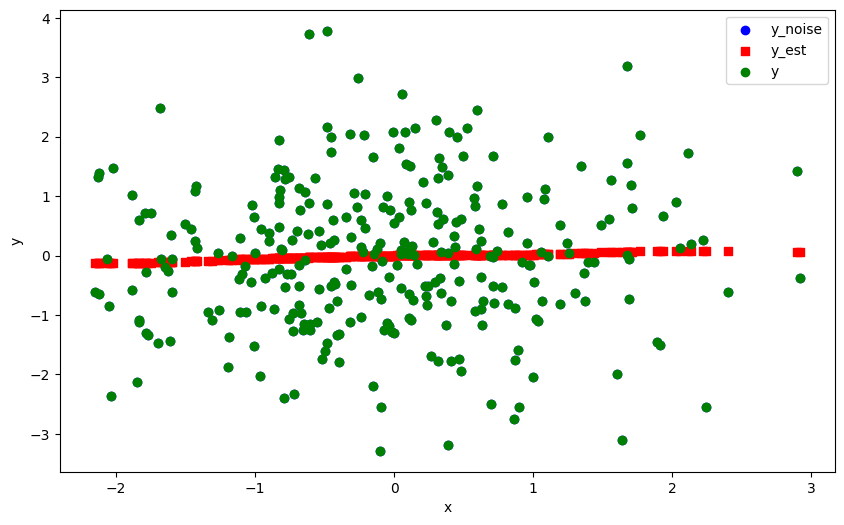

The programm is closed


In [15]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

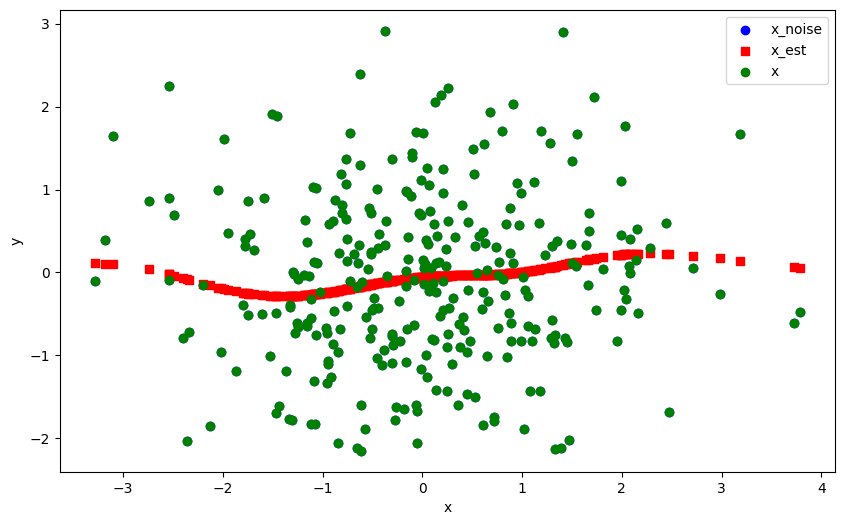

The programm is closed


In [16]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], X_true.detach().numpy()[:, 0], label='x_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# Cov = 0.8

In [17]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0.8],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.8, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
x1 = epsilon[:, 0]
x2 = epsilon[:, 1]
# Step 4: Combine these results into a new tensor of shape [n, 2]
x1_true = x1 #+ epsilon[:, 0]
x2_true = x2 #+ epsilon[:, 1]
X = torch.stack((x1, x2), dim=1)
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit()
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/23000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.1

Inner iteration 0
	h(W(model)): 0.4939715633632408
	score(model): 0.7032949579645442
	 mle: 2.007947279816333
	 mse: 1.0122399411608152
	W1: tensor([[1.0000e-04, 1.1183e+00],
        [8.8881e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.49397126568654137
	structure loss: 2.976766994011726e-07
	Sigma: tensor([[ 1.0000, -0.0382],
        [-0.0382,  1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.961805845808123


  0%|          | 2/23000.0 [00:12<41:19:06,  6.47s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.029607977895221224
	score(model): 0.16450479166733284
	 mle: 1.3049925054612626
	 mse: 0.768563254324971
	W1: tensor([[1.0000e-04, 6.4593e-01],
        [3.7671e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.029605224388716156
	structure loss: 2.753506505068226e-06
	Sigma: tensor([[ 0.5666, -0.2219],
        [-0.2219,  0.9707]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.46854295576074456


  0%|          | 3/23000.0 [00:26<60:43:21,  9.51s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.02958559021450268
	score(model): 0.16444265452243428
	 mle: 1.3046309906360212
	 mse: 0.7679360233075293
	W1: tensor([[1.0000e-04, 6.5369e-01],
        [3.7210e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02958283958079644
	structure loss: 2.750633706243011e-06
	Sigma: tensor([[ 0.5694, -0.2205],
        [-0.2205,  0.9672]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4713279647722824


  0%|          | 4/23000.0 [00:39<68:24:39, 10.71s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.02961341959943596
	score(model): 0.16442390836224374
	 mle: 1.3041604666122915
	 mse: 0.7678370482668916
	W1: tensor([[1.0000e-04, 6.5427e-01],
        [3.7195e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.029610658435306636
	structure loss: 2.7611641293251443e-06
	Sigma: tensor([[ 0.5694, -0.2208],
        [-0.2208,  0.9670]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4710966946674843


  0%|          | 5/23000.0 [00:52<72:55:58, 11.42s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.029616023135800352
	score(model): 0.16442173360685983
	 mle: 1.30410981712051
	 mse: 0.7678217035437082
	W1: tensor([[1.0000e-04, 6.5439e-01],
        [3.7190e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.029613260651570883
	structure loss: 2.7624842294689256e-06
	Sigma: tensor([[ 0.5694, -0.2208],
        [-0.2208,  0.9670]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4710784140041461


  0%|          | 6/23000.0 [01:04<75:43:06, 11.85s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.02961615485523934
	score(model): 0.1644216213412864
	 mle: 1.3041071956632666
	 mse: 0.7678208618672603
	W1: tensor([[1.0000e-04, 6.5439e-01],
        [3.7190e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.02961339229995552
	structure loss: 2.7625552838188294e-06
	Sigma: tensor([[ 0.5694, -0.2208],
        [-0.2208,  0.9670]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4710775405330962

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.05

Inner iteration 0
	h(W(model)): 0.29020386443204654
	score(model): 0.5136263181064372
	 mle: 4.362226058145405
	 mse: 1.5023193149497251
	W1: tensor([[1.0000e-04, 9.1643e-01],
        [8.3131e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.29019639932985974
	structure loss: 7.465102186798855e-06
	Sigma: tensor([[ 0.5694, -0.2208],
        [-0.2208,  0.9670]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.47107754048636497


  0%|          | 8/23000.0 [01:17<58:24:41,  9.15s/it]


mu 0.05

Inner iteration 1000
	h(W(model)): 0.004791413687679935
	score(model): 0.0892617353522133
	 mle: 1.6603425607129711
	 mse: 0.8691701268955073
	W1: tensor([[1.0000e-04, 5.0548e-01],
        [1.9365e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004791123741015202
	structure loss: 2.899466647332538e-07
	Sigma: tensor([[0.6933, 0.0995],
        [0.0995, 1.0556]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6677466389326892


  0%|          | 9/23000.0 [01:29<63:52:16, 10.00s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.004814338309238832
	score(model): 0.08925710967668017
	 mle: 1.6596445032658682
	 mse: 0.8683981463427688
	W1: tensor([[1.0000e-04, 5.0911e-01],
        [1.9273e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004814059634552503
	structure loss: 2.7867468632876424e-07
	Sigma: tensor([[0.6943, 0.0970],
        [0.0970, 1.0463]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6693147399856578


  0%|          | 10/23000.0 [01:42<68:54:35, 10.79s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.004812992988537661
	score(model): 0.08925793650597623
	 mle: 1.6596823055384935
	 mse: 0.8684023051762699
	W1: tensor([[1.0000e-04, 5.0924e-01],
        [1.9266e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004812714004560625
	structure loss: 2.789839770355254e-07
	Sigma: tensor([[0.6943, 0.0970],
        [0.0970, 1.0462]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6693424608607164


  0%|          | 11/23000.0 [01:55<72:27:17, 11.35s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.004812940544147845
	score(model): 0.08925797887346335
	 mle: 1.65968388407452
	 mse: 0.8684017968368294
	W1: tensor([[1.0000e-04, 5.0925e-01],
        [1.9265e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004812661546264696
	structure loss: 2.789978831487655e-07
	Sigma: tensor([[0.6943, 0.0970],
        [0.0970, 1.0462]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6693470041159723


  0%|          | 12/23000.0 [02:08<75:07:47, 11.77s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.0048129401853287835
	score(model): 0.08925797917708192
	 mle: 1.6596838937050573
	 mse: 0.8684017864774649
	W1: tensor([[1.0000e-04, 5.0925e-01],
        [1.9265e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.004812661187392653
	structure loss: 2.789979361306899e-07
	Sigma: tensor([[0.6943, 0.0970],
        [0.0970, 1.0462]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6693470546648321

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.025

Inner iteration 0
	h(W(model)): 0.3031693132442278
	score(model): 0.3936450074526085
	 mle: 3.528940953494293
	 mse: 1.7965872407845815
	W1: tensor([[1.0000e-04, 9.1981e-01],
        [8.4656e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.30316784253417506
	structure loss: 1.4707100527422412e-06
	Sigma: tensor([[0.6943, 0.0970],
        [0.0970, 1.0462]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6693470546628205


  0%|          | 14/23000.0 [02:20<59:11:08,  9.27s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0010703324545722885
	score(model): 0.04589550284813872
	 mle: 1.7690279758555023
	 mse: 0.9364268994734225
	W1: tensor([[1.0000e-04, 4.8557e-01],
        [9.5222e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0010689465953634958
	structure loss: 1.3858592087926704e-06
	Sigma: tensor([[0.8080, 0.2379],
        [0.2379, 1.0651]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6661381177882337


  0%|          | 15/23000.0 [02:34<65:22:44, 10.24s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0010811226496863717
	score(model): 0.045908725239772095
	 mle: 1.767396229691367
	 mse: 0.9264250413123368
	W1: tensor([[1.0000e-04, 5.3355e-01],
        [8.7100e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0010798363243851306
	structure loss: 1.2863253012411046e-06
	Sigma: tensor([[0.8138, 0.2098],
        [0.2098, 1.0335]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6868821304709803


  0%|          | 16/23000.0 [02:47<70:49:45, 11.09s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.0010805649871370219
	score(model): 0.04590928550214252
	 mle: 1.7674094031935577
	 mse: 0.926263849102229
	W1: tensor([[1.0000e-04, 5.3454e-01],
        [8.6916e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.001079279932040933
	structure loss: 1.2850550960888905e-06
	Sigma: tensor([[0.8141, 0.2093],
        [0.2093, 1.0330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6873224538848483


  0%|          | 17/23000.0 [03:00<73:47:03, 11.56s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0010805609223683433
	score(model): 0.04590930973167803
	 mle: 1.7674105875313468
	 mse: 0.9262644365678004
	W1: tensor([[1.0000e-04, 5.3454e-01],
        [8.6916e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0010792758567559346
	structure loss: 1.2850656124086934e-06
	Sigma: tensor([[0.8141, 0.2093],
        [0.2093, 1.0330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6873228164461218


  0%|          | 18/23000.0 [03:14<77:31:23, 12.14s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.0010805608816282686
	score(model): 0.04590931006091875
	 mle: 1.7674106025414598
	 mse: 0.9262644479472625
	W1: tensor([[1.0000e-04, 5.3454e-01],
        [8.6916e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0010792758158659765
	structure loss: 1.2850657622920543e-06
	Sigma: tensor([[0.8141, 0.2093],
        [0.2093, 1.0330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6873228090744125

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.0125

Inner iteration 0
	h(W(model)): 0.24290538388164995
	score(model): 0.285046651649889
	 mle: 3.2889710775435246
	 mse: 1.8589150907108427
	W1: tensor([[1.0000e-04, 8.0027e-01],
        [8.7095e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.24289925403868518
	structure loss: 6.129842964774923e-06
	Sigma: tensor([[0.8141, 0.2093],
        [0.2093, 1.0330]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6873228090743687


  0%|          | 20/23000.0 [03:27<62:36:09,  9.81s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.00028058002566558283
	score(model): 0.023273411886008774
	 mle: 1.814879275426077
	 mse: 0.9550760596015979
	W1: tensor([[1.0000e-04, 5.5089e-01],
        [4.2873e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00027893528487510366
	structure loss: 1.6447407904791704e-06
	Sigma: tensor([[0.8701, 0.2321],
        [0.2321, 1.0166]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6999519167977405


  0%|          | 21/23000.0 [03:40<66:30:27, 10.42s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0002700051927684769
	score(model): 0.02327533395146557
	 mle: 1.813615374129358
	 mse: 0.9437672872649967
	W1: tensor([[1.0000e-04, 6.0737e-01],
        [3.8151e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002684850749004042
	structure loss: 1.5201178680726958e-06
	Sigma: tensor([[0.8815, 0.2026],
        [0.2026, 0.9959]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7281897140493272


  0%|          | 22/23000.0 [03:52<69:33:33, 10.90s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0002696919202486465
	score(model): 0.023275760860514912
	 mle: 1.8136403451698628
	 mse: 0.9436391402615107
	W1: tensor([[1.0000e-04, 6.0837e-01],
        [3.8066e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002681729049576198
	structure loss: 1.5190152910267017e-06
	Sigma: tensor([[0.8816, 0.2022],
        [0.2022, 0.9956]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.728555370575774


  0%|          | 23/23000.0 [04:04<71:55:30, 11.27s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.00026968381774067617
	score(model): 0.02327577966218058
	 mle: 1.813641947207391
	 mse: 0.9436384728053031
	W1: tensor([[1.0000e-04, 6.0839e-01],
        [3.8064e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00026816478127811294
	structure loss: 1.5190364625632309e-06
	Sigma: tensor([[0.8816, 0.2022],
        [0.2022, 0.9956]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7285597620503429


  0%|          | 24/23000.0 [04:17<73:42:38, 11.55s/it]


mu 0.0125

Inner iteration 5000
	h(W(model)): 0.0002696838116207028
	score(model): 0.023275779709468414
	 mle: 1.8136419499543819
	 mse: 0.9436384701027156
	W1: tensor([[1.0000e-04, 6.0839e-01],
        [3.8064e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00026816477511149017
	structure loss: 1.5190365092126014e-06
	Sigma: tensor([[0.8816, 0.2022],
        [0.2022, 0.9956]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7285597726914813


  0%|          | 25/23000.0 [04:29<75:14:32, 11.79s/it]


mu 0.0125

Inner iteration 6000
	h(W(model)): 0.000269351596859258
	score(model): 0.02327609928200569
	 mle: 1.813685534058513
	 mse: 0.9435738938405908
	W1: tensor([[1.0000e-04, 6.0863e-01],
        [3.8026e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0002678342313084947
	structure loss: 1.5173655507633036e-06
	Sigma: tensor([[0.8814, 0.2020],
        [0.2020, 0.9955]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.728555924066873


  0%|          | 26/23000.0 [04:41<76:11:58, 11.94s/it]


mu 0.0125

Inner iteration 7000
	h(W(model)): 0.00027229752493410027
	score(model): 0.023281279640696595
	 mle: 1.8139905154759453
	 mse: 0.9444543435484438
	W1: tensor([[1.0000e-04, 6.0515e-01],
        [3.8453e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00027075610356952495
	structure loss: 1.541421364575316e-06
	Sigma: tensor([[0.8809, 0.2048],
        [0.2048, 0.9973]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7262325841752191


  0%|          | 27/23000.0 [04:54<69:31:19, 10.89s/it]


mu 0.0125

Inner iteration 7999
	h(W(model)): 0.0002703836763788103
	score(model): 0.02327768072883189
	 mle: 1.813754830476629
	 mse: 0.9438302948395576
	W1: tensor([[1.0000e-04, 6.0787e-01],
        [3.8147e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00026886397543313123
	structure loss: 1.51970094567906e-06
	Sigma: tensor([[0.8814, 0.2024],
        [0.2024, 0.9958]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7282459504565529
final_W1:  tensor([[1.0000e-04, 6.0787e-01],
        [3.8147e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.8814, 0.2024],
        [0.2024, 0.9958]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[0.94146858 0.79828592]
 [0.79828592 1.61927034]]
estimated Sigma:  [[0.88136904 0.20242416]
 [0.20242416 0.99578822]]


## T = 6, higher sparsity

In [20]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0.8],    # Variance of X is 1, covariance between X and Y is 0.8
                [0.8, 1.5]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
x1 = epsilon[:, 0]
x2 = epsilon[:, 1]
# Step 4: Combine these results into a new tensor of shape [n, 2]
x1_true = x1 #+ epsilon[:, 0]
x2_true = x2 #+ epsilon[:, 1]
X = torch.stack((x1, x2), dim=1)
X_true = torch.stack((x1_true, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit(T = 6, tau=0.2)
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.1

Inner iteration 0
	h(W(model)): 0.5129869686088219
	score(model): 0.7788393448512649
	 mle: 1.831625407992318
	 mse: 0.9189339170208284
	W1: tensor([[1.0000e-04, 1.1240e+00],
        [9.0113e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.5129869401686245
	structure loss: 2.8440197419321578e-08
	Sigma: tensor([[ 1.0000, -0.0117],
        [-0.0117,  1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.988294085413594


  0%|          | 2/33000.0 [00:12<56:46:26,  6.19s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 1.3126964930169173e-07
	score(model): 0.17619083606070385
	 mle: 1.7448833610811272
	 mse: 1.1968553537335733
	W1: tensor([[0.0001, 0.0322],
        [0.0094, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.574959154903581e-08
	structure loss: 6.552005775265592e-08
	Sigma: tensor([[0.9566, 0.7633],
        [0.7633, 1.4118]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.3877361952547111


  0%|          | 3/33000.0 [00:25<81:43:20,  8.92s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 3.1578439131263496e-08
	score(model): 0.1752890773041585
	 mle: 1.745634489014436
	 mse: 1.2012903311731764
	W1: tensor([[0.0001, 0.0076],
        [0.0098, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2777327579603934e-08
	structure loss: 8.801111551659561e-09
	Sigma: tensor([[0.9509, 0.7571],
        [0.7571, 1.4089]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.38897747396567206


  0%|          | 4/33000.0 [00:37<94:34:23, 10.32s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 1.0565063525917895e-07
	score(model): 0.1758517196819173
	 mle: 1.74387091725876
	 mse: 1.2044986277674563
	W1: tensor([[0.0001, 0.0218],
        [0.0140, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 6.70320088325127e-08
	structure loss: 3.861862642666625e-08
	Sigma: tensor([[0.9494, 0.7570],
        [0.7570, 1.4098]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.3883994862982191


  0%|          | 5/33000.0 [00:49<100:26:04, 10.96s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 5.617112060726372e-08
	score(model): 0.1755001078383428
	 mle: 1.7440493814922073
	 mse: 1.199917739568358
	W1: tensor([[0.0001, 0.0134],
        [0.0133, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.582435370574899e-08
	structure loss: 2.034676690151473e-08
	Sigma: tensor([[0.9507, 0.7562],
        [0.7562, 1.4083]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.38943259703251654


  0%|          | 6/33000.0 [01:02<104:20:26, 11.38s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 6.292632173332664e-08
	score(model): 0.17565521758138908
	 mle: 1.7449563352117572
	 mse: 1.19553580439066
	W1: tensor([[0.0001, 0.0127],
        [0.0156, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.960341254938271e-08
	structure loss: 2.332290918394393e-08
	Sigma: tensor([[0.9516, 0.7589],
        [0.7589, 1.4107]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.38830615858107975

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.05

Inner iteration 0
	h(W(model)): 0.899491407959653
	score(model): 1.098491283539148
	 mle: 3.026966728693236
	 mse: 2.2737759924737833
	W1: tensor([[1.0000e-04, 1.2531e+00],
        [1.0702e+00, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.8993349983909611
	structure loss: 0.00015640956869189537
	Sigma: tensor([[0.9517, 0.7589],
        [0.7589, 1.4106]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.38832747617251495


  0%|          | 8/33000.0 [01:14<81:19:04,  8.87s/it] 


mu 0.05

Inner iteration 1000
	h(W(model)): 2.6083862200986684e-08
	score(model): 0.08762402489563165
	 mle: 1.7467680775133085
	 mse: 1.2005844835116888
	W1: tensor([[0.0001, 0.0053],
        [0.0082, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.0944691758728595e-08
	structure loss: 5.1391704422580886e-09
	Sigma: tensor([[0.9370, 0.7325],
        [0.7325, 1.3772]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.3921723193227962


  0%|          | 9/33000.0 [01:26<89:31:03,  9.77s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 3.209526746316016e-08
	score(model): 0.08775366920578917
	 mle: 1.7476600805919327
	 mse: 1.2000901526296963
	W1: tensor([[0.0001, 0.0128],
        [0.0049, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.1951054307578488e-08
	structure loss: 1.0144213155581675e-08
	Sigma: tensor([[0.9408, 0.7336],
        [0.7336, 1.3813]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.39516756741974596


  0%|          | 10/33000.0 [01:39<95:55:37, 10.47s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 3.9736267727863903e-08
	score(model): 0.08782637950845687
	 mle: 1.747518434879911
	 mse: 1.198478985104429
	W1: tensor([[0.0001, 0.0150],
        [0.0068, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.519914366061471e-08
	structure loss: 1.4537124067249194e-08
	Sigma: tensor([[0.9392, 0.7323],
        [0.7323, 1.3805]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.39508306911203606


  0%|          | 11/33000.0 [01:51<100:48:00, 11.00s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 4.4348925472021407e-08
	score(model): 0.08781334519239271
	 mle: 1.746516572853052
	 mse: 1.2048278092428273
	W1: tensor([[0.0001, 0.0146],
        [0.0090, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.8629010273562017e-08
	structure loss: 1.571991519845939e-08
	Sigma: tensor([[0.9366, 0.7304],
        [0.7304, 1.3808]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.3953017499274783


  0%|          | 12/33000.0 [02:04<104:24:46, 11.39s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 2.610762190698267e-07
	score(model): 0.08830957202821747
	 mle: 1.744839990723472
	 mse: 1.205760400413893
	W1: tensor([[0.0001, 0.0382],
        [0.0145, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.7238663208019034e-07
	structure loss: 8.868958698963636e-08
	Sigma: tensor([[0.9373, 0.7293],
        [0.7293, 1.3778]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.39577957770709593

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.025

Inner iteration 0
	h(W(model)): 0.6144790937507854
	score(model): 0.7559218713272965
	 mle: 4.755229878194622
	 mse: 1.8087878282685947
	W1: tensor([[1.0000e-04, 1.2210e+00],
        [9.0783e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.6143559720087257
	structure loss: 0.00012312174205963977
	Sigma: tensor([[0.9373, 0.7293],
        [0.7293, 1.3779]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.39574864649047387


  0%|          | 14/33000.0 [02:16<82:45:19,  9.03s/it] 


mu 0.025

Inner iteration 1000
	h(W(model)): 2.5617137341426965e-08
	score(model): 0.043900688238033496
	 mle: 1.7505913920595053
	 mse: 1.2028629716627308
	W1: tensor([[0.0001, 0.0032],
        [0.0098, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.047543379291028e-08
	structure loss: 5.1417035485166845e-09
	Sigma: tensor([[0.9182, 0.6977],
        [0.6977, 1.3429]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.40126711944756477


  0%|          | 15/33000.0 [02:28<89:45:07,  9.80s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 2.208249483102162e-08
	score(model): 0.04389540760124289
	 mle: 1.7520035788646444
	 mse: 1.2011677238639864
	W1: tensor([[0.0001, 0.0052],
        [0.0036, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.0172331360868156e-08
	structure loss: 1.9101634701534634e-09
	Sigma: tensor([[0.9217, 0.6929],
        [0.6929, 1.3377]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.40621840623580896


  0%|          | 16/33000.0 [02:40<95:22:29, 10.41s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 2.8511766779598486e-08
	score(model): 0.043944710007265166
	 mle: 1.751214836089606
	 mse: 1.1969457050924535
	W1: tensor([[0.0001, 0.0120],
        [0.0037, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.0979412429511513e-08
	structure loss: 7.532354350086974e-09
	Sigma: tensor([[0.9218, 0.6915],
        [0.6915, 1.3352]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4067742679362531


  0%|          | 17/33000.0 [02:52<99:51:39, 10.90s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 3.5245009999694716e-08
	score(model): 0.04398554217091945
	 mle: 1.7509777531874717
	 mse: 1.1966064463271455
	W1: tensor([[0.0001, 0.0112],
        [0.0092, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.528867470985574e-08
	structure loss: 9.956335289838976e-09
	Sigma: tensor([[0.9189, 0.6891],
        [0.6891, 1.3343]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4068453844383099


  0%|          | 18/33000.0 [03:05<103:27:18, 11.29s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 2.8593359419249345e-08
	score(model): 0.04397469519316692
	 mle: 1.7521748105063328
	 mse: 1.1998756970710123
	W1: tensor([[0.0001, 0.0094],
        [0.0070, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2133693100556684e-08
	structure loss: 6.459666318692661e-09
	Sigma: tensor([[0.9204, 0.6882],
        [0.6882, 1.3317]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.40771923646013397

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.0125

Inner iteration 0
	h(W(model)): 1.1552648779195722
	score(model): 1.2198436596491105
	 mle: 4.139929989945957
	 mse: 1.9401361090785167
	W1: tensor([[1.0000e-04, 1.2693e+00],
        [1.1975e+00, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.1551206697942398
	structure loss: 0.00014420812533244565
	Sigma: tensor([[0.9203, 0.6882],
        [0.6882, 1.3315]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4077116676898025


  0%|          | 20/33000.0 [03:17<82:15:41,  8.98s/it] 


mu 0.0125

Inner iteration 1000
	h(W(model)): 1.2944854932899828e-07
	score(model): 0.022196723308064797
	 mle: 1.7581780073084252
	 mse: 1.1791592322911573
	W1: tensor([[0.0001, 0.0121],
        [0.0310, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 8.993821110081512e-08
	structure loss: 3.9510338228183155e-08
	Sigma: tensor([[0.8688, 0.5982],
        [0.5982, 1.2674]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4375836806995553


  0%|          | 21/33000.0 [03:29<89:02:34,  9.72s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 2.3854438413680645e-08
	score(model): 0.02209317684401376
	 mle: 1.7628333207320752
	 mse: 1.1992817310824566
	W1: tensor([[0.0001, 0.0010],
        [0.0098, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.0052388638447383e-08
	structure loss: 3.802049775233262e-09
	Sigma: tensor([[0.8890, 0.6248],
        [0.6248, 1.2762]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.428487586680879


  0%|          | 22/33000.0 [03:41<94:35:05, 10.33s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 2.412955369583958e-08
	score(model): 0.022095466659977952
	 mle: 1.7626169027946403
	 mse: 1.1985188699582332
	W1: tensor([[0.0001, 0.0020],
        [0.0098, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.0197252315057312e-08
	structure loss: 3.932301380782267e-09
	Sigma: tensor([[0.8891, 0.6246],
        [0.6246, 1.2757]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4285903229697075


  0%|          | 23/33000.0 [03:53<98:54:33, 10.80s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 2.7334642045974653e-08
	score(model): 0.022110851425038585
	 mle: 1.762086103038594
	 mse: 1.19529010883409
	W1: tensor([[0.0001, 0.0059],
        [0.0103, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.1870209643282124e-08
	structure loss: 5.46443240269253e-09
	Sigma: tensor([[0.8885, 0.6215],
        [0.6215, 1.2720]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4298930155793868


  0%|          | 24/33000.0 [04:05<102:05:18, 11.15s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 2.7804906461659528e-08
	score(model): 0.02211594366052389
	 mle: 1.7623521875181105
	 mse: 1.195248455911911
	W1: tensor([[0.0001, 0.0061],
        [0.0106, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.207364024897629e-08
	structure loss: 5.731266212683239e-09
	Sigma: tensor([[0.8899, 0.6204],
        [0.6204, 1.2694]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4308469102634565

Dagma iter t=5 -- mu: 0.00625 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.00625

Inner iteration 0
	h(W(model)): 0.35143629866529363
	score(model): 0.378375141262462
	 mle: 3.547280052091968
	 mse: 1.8086363955159597
	W1: tensor([[1.0000e-04, 8.5842e-01],
        [9.7656e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.35137124467750613
	structure loss: 6.505398778750004e-05
	Sigma: tensor([[0.8898, 0.6203],
        [0.6203, 1.2693]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.43087982163908173


  0%|          | 26/33000.0 [04:18<82:00:18,  8.95s/it] 


mu 0.00625

Inner iteration 1000
	h(W(model)): 2.0653277161177252e-05
	score(model): 0.011431632427193831
	 mle: 1.7611452931058609
	 mse: 1.0924956702954016
	W1: tensor([[0.0001, 0.0825],
        [0.0774, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.0414745931507383e-05
	structure loss: 2.3853122966986925e-07
	Sigma: tensor([[0.8147, 0.4317],
        [0.4317, 1.1549]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5207713260751458


  0%|          | 27/33000.0 [04:30<89:19:40,  9.75s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 2.3735004192775483e-05
	score(model): 0.011435340749781893
	 mle: 1.7589948334456569
	 mse: 1.088564138282533
	W1: tensor([[0.0001, 0.0833],
        [0.0823, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.3483122194356554e-05
	structure loss: 2.5188199841892915e-07
	Sigma: tensor([[0.8157, 0.4288],
        [0.4288, 1.1556]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5244528508258132


  0%|          | 28/33000.0 [04:42<95:19:20, 10.41s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 2.377738412411943e-05
	score(model): 0.011435398769410446
	 mle: 1.7589702079893765
	 mse: 1.088520293206885
	W1: tensor([[0.0001, 0.0832],
        [0.0824, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.3525396497969808e-05
	structure loss: 2.5198762614962253e-07
	Sigma: tensor([[0.8156, 0.4287],
        [0.4287, 1.1557]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5244689325842277


  0%|          | 29/33000.0 [04:54<99:50:42, 10.90s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 2.377737098811983e-05
	score(model): 0.011435395806290619
	 mle: 1.758969781054617
	 mse: 1.088520321619467
	W1: tensor([[0.0001, 0.0832],
        [0.0824, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.3525384354794454e-05
	structure loss: 2.5198663332537456e-07
	Sigma: tensor([[0.8156, 0.4287],
        [0.4287, 1.1557]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5244687175495812


  0%|          | 30/33000.0 [05:07<103:30:15, 11.30s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 2.377737304323212e-05
	score(model): 0.011435395772392437
	 mle: 1.7589697742919141
	 mse: 1.0885203212933652
	W1: tensor([[0.0001, 0.0832],
        [0.0824, 0.0001]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.352538640915114e-05
	structure loss: 2.5198663408098216e-07
	Sigma: tensor([[0.8156, 0.4287],
        [0.4287, 1.1557]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5244687142297821

Dagma iter t=6 -- mu: 0.003125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.003125

Inner iteration 0
	h(W(model)): 0.38031113638592395
	score(model): 0.39326478635630124
	 mle: 3.3690394318871784
	 mse: 2.359935215703347
	W1: tensor([[1.0000e-04, 1.0332e+00],
        [8.4404e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.38027842879857987
	structure loss: 3.270758734408297e-05
	Sigma: tensor([[0.8156, 0.4287],
        [0.4287, 1.1557]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5244687142293438


  0%|          | 32/33000.0 [05:19<83:06:51,  9.08s/it] 


mu 0.003125

Inner iteration 1000
	h(W(model)): 3.133116406199893e-05
	score(model): 0.00592608926317344
	 mle: 1.7926505237864752
	 mse: 1.0475914516731308
	W1: tensor([[1.0000e-04, 1.9007e-01],
        [4.1371e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.093651025309896e-05
	structure loss: 3.9465380889997415e-07
	Sigma: tensor([[0.8706, 0.3230],
        [0.3230, 1.0470]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6239928612243513


  0%|          | 33/33000.0 [05:32<90:28:51,  9.88s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 2.2877274531104506e-05
	score(model): 0.005957045905884526
	 mle: 1.791365018340762
	 mse: 1.0297578398529326
	W1: tensor([[1.0000e-04, 2.3688e-01],
        [2.8212e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2351700746270353e-05
	structure loss: 5.255737848341524e-07
	Sigma: tensor([[0.8926, 0.3039],
        [0.3039, 1.0131]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.643025769141332


  0%|          | 34/33000.0 [05:44<96:21:39, 10.52s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 2.2845837220963298e-05
	score(model): 0.005957356544700881
	 mle: 1.7913250037066384
	 mse: 1.0295731769628427
	W1: tensor([[1.0000e-04, 2.3734e-01],
        [2.8137e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2318963288192606e-05
	structure loss: 5.268739327706923e-07
	Sigma: tensor([[0.8927, 0.3037],
        [0.3037, 1.0128]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6431919634925901


  0%|          | 35/33000.0 [05:57<100:58:12, 11.03s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 2.2845391923310146e-05
	score(model): 0.005957356722103771
	 mle: 1.791324288198062
	 mse: 1.0295716821185044
	W1: tensor([[1.0000e-04, 2.3735e-01],
        [2.8136e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2318510019658788e-05
	structure loss: 5.268819036513583e-07
	Sigma: tensor([[0.8927, 0.3037],
        [0.3037, 1.0128]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6431928146400784


  0%|          | 36/33000.0 [06:09<104:27:30, 11.41s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 2.2845392239408402e-05
	score(model): 0.005957356712999153
	 mle: 1.7913242828525058
	 mse: 1.0295716754275448
	W1: tensor([[1.0000e-04, 2.3735e-01],
        [2.8136e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2318510325192165e-05
	structure loss: 5.268819142162376e-07
	Sigma: tensor([[0.8927, 0.3037],
        [0.3037, 1.0128]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.643192817499958


  0%|          | 37/33000.0 [06:21<107:02:04, 11.69s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 2.2845392251932015e-05
	score(model): 0.005957356713012197
	 mle: 1.791324282831972
	 mse: 1.029571675397209
	W1: tensor([[1.0000e-04, 2.3735e-01],
        [2.8136e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2318510337626662e-05
	structure loss: 5.268819143053522e-07
	Sigma: tensor([[0.8927, 0.3037],
        [0.3037, 1.0128]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6431928175115122


  3%|▎         | 1037/33000.0 [06:34<3:22:29,  2.63it/s]


mu 0.003125

Inner iteration 7000
	h(W(model)): 2.284539225193294e-05
	score(model): 0.005957356713012455
	 mle: 1.791324282831951
	 mse: 1.0295716753971103
	W1: tensor([[1.0000e-04, 2.3735e-01],
        [2.8136e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.2318510337626662e-05
	structure loss: 5.268819143062772e-07
	Sigma: tensor([[0.8927, 0.3037],
        [0.3037, 1.0128]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6431928175115551
final_W1:  tensor([[1.0000e-04, 2.3735e-01],
        [2.8136e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.8927, 0.3037],
        [0.3037, 1.0128]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[0.9696218  0.78815612]
 [0.78815612 1.44768819]]
estimated Sigma:  [[0.89271244 0.30369813]
 [0.30369813 1.0128333 ]]


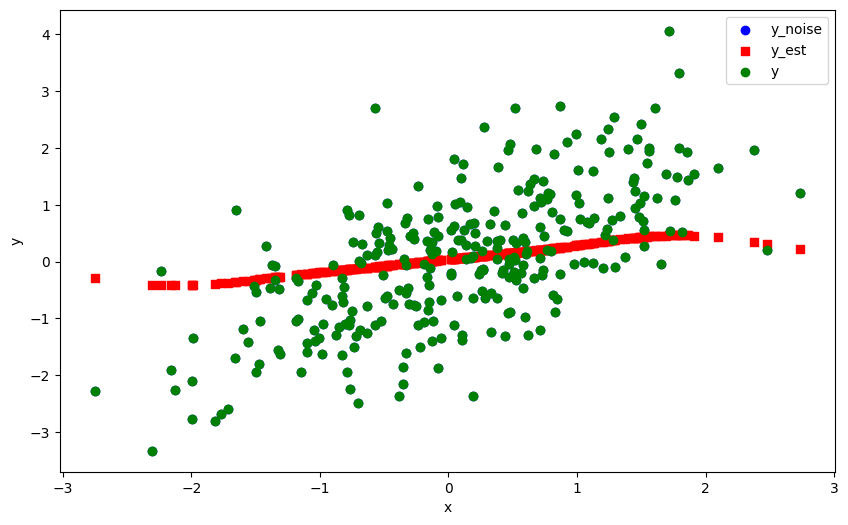

The programm is closed


In [22]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

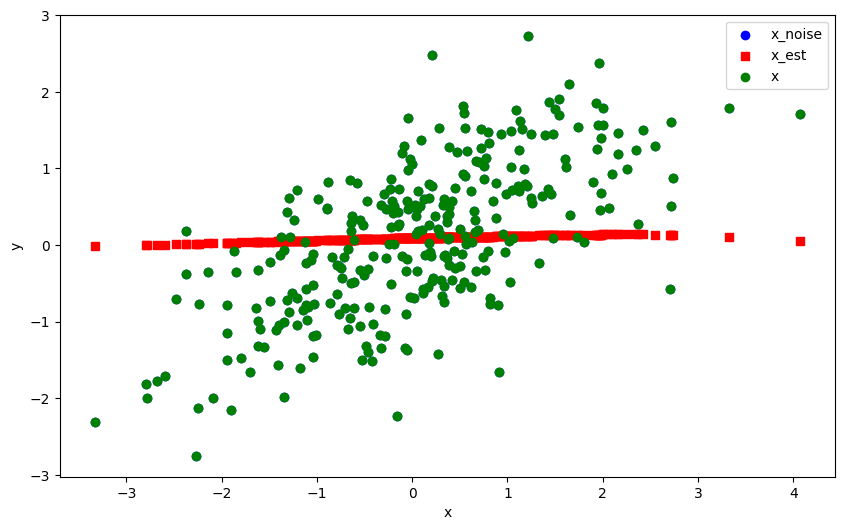

The programm is closed


In [23]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], X_true.detach().numpy()[:, 0], label='x_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

# quadratic

In [2]:
n_samples = 300  # Number of samples
dim = 2  # Dimension of the normal vectors

# Random data for X and X_hat
True_Sigma = np.array([[1, 0],    # Variance of X is 1, covariance between X and Y is 0.8
                [0, 1]])   # Variance of Y is 1, covariance between Y and X is 0.8
epsilon = np.random.multivariate_normal([0] * dim, True_Sigma, size=n_samples) #[n, d]
epsilon = torch.tensor(epsilon, dtype=torch.float64)
# x1 = torch.tensor(np.random.uniform(low=-3, high=3, size=n_samples))
# x1 = torch.zeros(n_samples)
# x1 = epsilon[:, 0]
x1 = torch.tensor(np.random.uniform(low=0, high=10, size=100))
x2 = (x1+2)**2
X = torch.stack((x1, x2), dim=1)
x2_true = (x1+2)**2 + epsilon[:, 1]
X_true = torch.stack((x1, x2_true), dim=1)
eq_model2 = admg_rkhs_discovery.ADMG_RKHSDagma(X_true, gamma = 1)
model2 = admg_rkhs_discovery.RKHS_discovery(x=X_true, model=eq_model2, admg_class = "ancestral", verbose=True)
W1, Sigma, x_est = model2.fit(T = 6, )
y_hat = x_est[:, 1].detach().numpy()
empirical_covariance = np.cov(epsilon, rowvar=False)
print("Empirical Covariance Matrix:", empirical_covariance)
print("estimated Sigma: ", Sigma)

  0%|          | 0/33000.0 [00:00<?, ?it/s]


Dagma iter t=1 -- mu: 0.1 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005


  0%|          | 1/33000.0 [00:00<3:31:41,  2.60it/s]


mu 0.1

Inner iteration 0
	h(W(model)): 0.00881935000116968
	score(model): 3.3087991879493894
	 mle: 32.79142269522925
	 mse: 16.513748083818093
	W1: tensor([[1.0000e-04, 7.9260e-01],
        [1.6756e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.008819348717768793
	structure loss: 1.283400887300279e-09
	Sigma: tensor([[1.0000, 0.0044],
        [0.0044, 1.0000]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.995577877627084


  0%|          | 2/33000.0 [00:12<69:01:07,  7.53s/it]


mu 0.1

Inner iteration 1000
	h(W(model)): 0.025763941728277444
	score(model): 0.20044849805375753
	 mle: 1.7466747701207577
	 mse: 1.2172821866402674
	W1: tensor([[1.0000e-04, 3.7656e+00],
        [5.9981e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.025507184267123062
	structure loss: 0.00025675746115438186
	Sigma: tensor([[0.5159, 0.4255],
        [0.4255, 2.0807]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.40771843726431045


  0%|          | 3/33000.0 [00:24<87:50:24,  9.58s/it]


mu 0.1

Inner iteration 2000
	h(W(model)): 0.021191049712483572
	score(model): 0.19379777901713183
	 mle: 1.7260530934828058
	 mse: 1.482600811348358
	W1: tensor([[1.0000e-04, 3.5337e+00],
        [5.7425e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.020588978684079162
	structure loss: 0.0006020710284044099
	Sigma: tensor([[0.5316, 0.6943],
        [0.6943, 2.2809]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2895390023046971


  0%|          | 4/33000.0 [00:36<95:02:55, 10.37s/it]


mu 0.1

Inner iteration 3000
	h(W(model)): 0.02045933782860824
	score(model): 0.1939618167809349
	 mle: 1.7350221031180055
	 mse: 1.6037709573982708
	W1: tensor([[1.0000e-04, 3.4511e+00],
        [5.7587e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.019748074988775066
	structure loss: 0.0007112628398331725
	Sigma: tensor([[0.5312, 0.7727],
        [0.7727, 2.5126]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.26547344236085596


  0%|          | 5/33000.0 [00:48<99:05:12, 10.81s/it]


mu 0.1

Inner iteration 4000
	h(W(model)): 0.02037449444246924
	score(model): 0.19398757295414396
	 mle: 1.7361307788867837
	 mse: 1.61775937737147
	W1: tensor([[1.0000e-04, 3.4423e+00],
        [5.7592e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.019650907606769685
	structure loss: 0.000723586835699553
	Sigma: tensor([[0.5312, 0.7813],
        [0.7813, 2.5393]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2630078678160387


  0%|          | 6/33000.0 [00:59<101:20:02, 11.06s/it]


mu 0.1

Inner iteration 4999
	h(W(model)): 0.020356493534629726
	score(model): 0.19399825207534088
	 mle: 1.7364177015463227
	 mse: 1.6187755773254224
	W1: tensor([[1.0000e-04, 3.4416e+00],
        [5.7576e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.019632140548502264
	structure loss: 0.000724352986127462
	Sigma: tensor([[0.5312, 0.7819],
        [0.7819, 2.5411]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2628396718613144

Dagma iter t=2 -- mu: 0.05 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.05

Inner iteration 0
	h(W(model)): 0.2015682324201538
	score(model): 0.3414938143203827
	 mle: 2.792039329540313
	 mse: 2.6734292795693895
	W1: tensor([[1.0000e-04, 2.9729e+00],
        [2.1329e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.20102511129785494
	structure loss: 0.0005431211222988452
	Sigma: tensor([[0.5312, 0.7819],
        [0.7819, 2.5411]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.26283952656222215


  0%|          | 8/33000.0 [01:11<77:40:14,  8.48s/it] 


mu 0.05

Inner iteration 1000
	h(W(model)): 0.0065836668113699185
	score(model): 0.10595650150607012
	 mle: 1.9875055839018212
	 mse: 1.9606736839093069
	W1: tensor([[1.0000e-04, 3.2318e+00],
        [3.2761e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005604966412762646
	structure loss: 0.000978700398607272
	Sigma: tensor([[0.6464, 0.9680],
        [0.9680, 2.8272]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2787171057331523


  0%|          | 9/33000.0 [01:22<85:00:20,  9.28s/it]


mu 0.05

Inner iteration 2000
	h(W(model)): 0.00654059527503261
	score(model): 0.10608267834531357
	 mle: 1.9908415618628648
	 mse: 1.887885084739127
	W1: tensor([[1.0000e-04, 3.2764e+00],
        [3.2353e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005618088500373375
	structure loss: 0.0009225067746592352
	Sigma: tensor([[0.6503, 0.9270],
        [0.9270, 2.6997]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2932541324419183


  0%|          | 10/33000.0 [01:34<90:51:27,  9.91s/it]


mu 0.05

Inner iteration 3000
	h(W(model)): 0.006540482804926617
	score(model): 0.10608345720351563
	 mle: 1.990859497056356
	 mse: 1.8873657575527054
	W1: tensor([[1.0000e-04, 3.2768e+00],
        [3.2350e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005618322974701773
	structure loss: 0.0009221598302248443
	Sigma: tensor([[0.6504, 0.9267],
        [0.9267, 2.6988]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2933544038693309


  0%|          | 11/33000.0 [01:46<95:07:00, 10.38s/it]


mu 0.05

Inner iteration 4000
	h(W(model)): 0.006583750265907262
	score(model): 0.10611313191750316
	 mle: 1.9905867402453148
	 mse: 1.8925605423601963
	W1: tensor([[1.0000e-04, 3.2733e+00],
        [3.2498e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0056580853114112095
	structure loss: 0.0009256649544960522
	Sigma: tensor([[0.6499, 0.9294],
        [0.9294, 2.7076]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2922816182277535


  0%|          | 12/33000.0 [01:57<98:11:10, 10.72s/it]


mu 0.05

Inner iteration 4999
	h(W(model)): 0.00657918327343351
	score(model): 0.1061075999004505
	 mle: 1.9905659399568492
	 mse: 1.890061626973325
	W1: tensor([[1.0000e-04, 3.2752e+00],
        [3.2471e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.005655129461422437
	structure loss: 0.0009240538120110732
	Sigma: tensor([[0.6501, 0.9281],
        [0.9281, 2.7032]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.29279202883385524

Dagma iter t=3 -- mu: 0.025 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.025

Inner iteration 0
	h(W(model)): 0.627783018132844
	score(model): 0.7008253046138684
	 mle: 2.915792896651328
	 mse: 2.940659282516831
	W1: tensor([[1.0000e-04, 2.8210e+00],
        [3.9699e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.6270839758648341
	structure loss: 0.0006990422680098751
	Sigma: tensor([[0.6501, 0.9281],
        [0.9281, 2.7032]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.2927859225759909


  0%|          | 14/33000.0 [02:09<78:07:10,  8.53s/it]


mu 0.025

Inner iteration 1000
	h(W(model)): 0.0031094972242931363
	score(model): 0.05960569876446848
	 mle: 2.259416669854282
	 mse: 3.429933299787052
	W1: tensor([[1.0000e-04, 2.5616e+00],
        [2.2117e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0016048598916209578
	structure loss: 0.0015046373326721785
	Sigma: tensor([[0.6942, 1.5142],
        [1.5142, 5.2274]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.23492950536189663


  0%|          | 15/33000.0 [02:20<84:58:24,  9.27s/it]


mu 0.025

Inner iteration 2000
	h(W(model)): 0.0023349064038904917
	score(model): 0.058196417119785834
	 mle: 2.234550668368295
	 mse: 1.8634339638485347
	W1: tensor([[1.0000e-04, 3.3386e+00],
        [1.6798e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0015725945523961116
	structure loss: 0.0007623118514943801
	Sigma: tensor([[0.7304, 0.8270],
        [0.8270, 2.4321]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.39468834059166735


  0%|          | 16/33000.0 [02:32<90:36:43,  9.89s/it]


mu 0.025

Inner iteration 3000
	h(W(model)): 0.002153374808229984
	score(model): 0.058399282319148274
	 mle: 2.249837687727136
	 mse: 1.7018336401600658
	W1: tensor([[1.0000e-04, 3.4780e+00],
        [1.5939e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0015366813483832509
	structure loss: 0.0006166934598467329
	Sigma: tensor([[0.7490, 0.7140],
        [0.7140, 2.1951]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.45591815765407556


  0%|          | 17/33000.0 [02:44<95:09:18, 10.39s/it]


mu 0.025

Inner iteration 4000
	h(W(model)): 0.0021547713131483547
	score(model): 0.05839860037358984
	 mle: 2.249753715852307
	 mse: 1.7027632471257206
	W1: tensor([[1.0000e-04, 3.4771e+00],
        [1.5946e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0015372369561212906
	structure loss: 0.000617534357027064
	Sigma: tensor([[0.7489, 0.7147],
        [0.7147, 2.1964]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.45554752175244734


  0%|          | 18/33000.0 [02:55<98:12:42, 10.72s/it]


mu 0.025

Inner iteration 4999
	h(W(model)): 0.002153797019178619
	score(model): 0.05839920342776537
	 mle: 2.249816845987331
	 mse: 1.7020612760470197
	W1: tensor([[1.0000e-04, 3.4778e+00],
        [1.5941e-02, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0015368785010201336
	structure loss: 0.0006169185181584855
	Sigma: tensor([[0.7490, 0.7142],
        [0.7142, 2.1954]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.4558073861025131

Dagma iter t=4 -- mu: 0.0125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.0125

Inner iteration 0
	h(W(model)): 0.1799530034361619
	score(model): 0.2174881553863157
	 mle: 2.9971527232475252
	 mse: 2.656177236460275
	W1: tensor([[1.0000e-04, 3.0341e+00],
        [1.9747e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.17948148377794082
	structure loss: 0.0004715196582210923
	Sigma: tensor([[0.7490, 0.7142],
        [0.7142, 2.1954]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.455808864125416


  0%|          | 20/33000.0 [03:07<78:52:30,  8.61s/it]


mu 0.0125

Inner iteration 1000
	h(W(model)): 0.000925969638046415
	score(model): 0.032352366224847065
	 mle: 2.5143206228849007
	 mse: 1.8862922632634076
	W1: tensor([[1.0000e-04, 3.4829e+00],
        [8.3263e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0004205232936884684
	structure loss: 0.0005054463443579466
	Sigma: tensor([[0.7778, 0.6455],
        [0.6455, 2.2758]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.5380562780214566


  0%|          | 21/33000.0 [03:19<86:04:39,  9.40s/it]


mu 0.0125

Inner iteration 2000
	h(W(model)): 0.0007103487508212808
	score(model): 0.03250979359538123
	 mle: 2.543952417918894
	 mse: 1.723304724384935
	W1: tensor([[1.0000e-04, 3.6810e+00],
        [7.5206e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003832099417357959
	structure loss: 0.00032713880908548485
	Sigma: tensor([[0.8163, 0.4914],
        [0.4914, 2.1104]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6508784408537839


  0%|          | 22/33000.0 [03:31<91:55:19, 10.03s/it]


mu 0.0125

Inner iteration 3000
	h(W(model)): 0.0007109521832616911
	score(model): 0.03251005432436702
	 mle: 2.5439292705724874
	 mse: 1.7238497198870693
	W1: tensor([[1.0000e-04, 3.6803e+00],
        [7.5226e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003832708458610945
	structure loss: 0.00032768133740059663
	Sigma: tensor([[0.8162, 0.4919],
        [0.4919, 2.1114]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6505902473956288


  0%|          | 23/33000.0 [03:43<96:22:03, 10.52s/it]


mu 0.0125

Inner iteration 4000
	h(W(model)): 0.000717064055720661
	score(model): 0.032513110145781635
	 mle: 2.5436860010910864
	 mse: 1.7243708224429157
	W1: tensor([[1.0000e-04, 3.6796e+00],
        [7.5731e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003882816220155405
	structure loss: 0.00032878243370512055
	Sigma: tensor([[0.8160, 0.4928],
        [0.4928, 2.1121]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6499451607090236


  0%|          | 24/33000.0 [03:55<99:41:23, 10.88s/it]


mu 0.0125

Inner iteration 4999
	h(W(model)): 0.000718734215506942
	score(model): 0.032516514076092955
	 mle: 2.5438258195592187
	 mse: 1.7242616977786105
	W1: tensor([[1.0000e-04, 3.6797e+00],
        [7.5952e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.0003905598227307294
	structure loss: 0.0003281743927762126
	Sigma: tensor([[0.8160, 0.4923],
        [0.4923, 2.1118]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6501920595450799

Dagma iter t=5 -- mu: 0.00625 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.00625

Inner iteration 0
	h(W(model)): 0.9523774787686993
	score(model): 0.9719303165058011
	 mle: 3.123265995834558
	 mse: 2.300676980296362
	W1: tensor([[1.0000e-04, 3.4924e+00],
        [3.9512e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.9520780982859289
	structure loss: 0.00029938048277033946
	Sigma: tensor([[0.8160, 0.4923],
        [0.4923, 2.1118]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.6501993489664548


  0%|          | 26/33000.0 [04:06<79:11:14,  8.65s/it]


mu 0.00625

Inner iteration 1000
	h(W(model)): 0.0003323303583383997
	score(model): 0.019261475461906968
	 mle: 3.0291348994432123
	 mse: 2.3129152060946123
	W1: tensor([[1.0000e-04, 3.7417e+00],
        [4.0896e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 0.00011709895152023364
	structure loss: 0.00021523140681816604
	Sigma: tensor([[0.8481, 0.3921],
        [0.3921, 2.9510]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7773440168571009


  0%|          | 27/33000.0 [04:18<85:42:23,  9.36s/it]


mu 0.00625

Inner iteration 2000
	h(W(model)): 0.000252613602103627
	score(model): 0.01843475232099975
	 mle: 2.909145227461779
	 mse: 2.0256049751717558
	W1: tensor([[1.0000e-04, 3.7949e+00],
        [3.6710e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.705612867838553e-05
	structure loss: 0.00015555747342524146
	Sigma: tensor([[0.8614, 0.3287],
        [0.3287, 2.4038]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7943177453738723


  0%|          | 28/33000.0 [04:30<90:59:31,  9.93s/it]


mu 0.00625

Inner iteration 3000
	h(W(model)): 0.00025195217839344824
	score(model): 0.01843646153071086
	 mle: 2.909521476876381
	 mse: 2.0253159676964736
	W1: tensor([[1.0000e-04, 3.7962e+00],
        [3.6691e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.70267612916409e-05
	structure loss: 0.00015492541710180734
	Sigma: tensor([[0.8617, 0.3279],
        [0.3279, 2.4041]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7948953645355042


  0%|          | 29/33000.0 [04:41<95:03:27, 10.38s/it]


mu 0.00625

Inner iteration 4000
	h(W(model)): 0.00025216452535948967
	score(model): 0.01843528191729204
	 mle: 2.909302971195057
	 mse: 2.025002079074234
	W1: tensor([[1.0000e-04, 3.7964e+00],
        [3.6702e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.709169954064123e-05
	structure loss: 0.00015507282581884844
	Sigma: tensor([[0.8617, 0.3280],
        [0.3280, 2.4033]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.7947999978304698


  0%|          | 30/33000.0 [04:53<98:13:43, 10.73s/it]


mu 0.00625

Inner iteration 4999
	h(W(model)): 0.0002526538187152684
	score(model): 0.018436865114834274
	 mle: 2.9094714743351737
	 mse: 2.0252892968098877
	W1: tensor([[1.0000e-04, 3.7961e+00],
        [3.6838e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 9.779979220070345e-05
	structure loss: 0.00015485402651456496
	Sigma: tensor([[0.8618, 0.3278],
        [0.3278, 2.4045]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.794996093943083

Dagma iter t=6 -- mu: 0.003125 ------------------------------
success:  False

Minimize s=1.0 -- lr=0.005

mu 0.003125

Inner iteration 0
	h(W(model)): 1.0887985504767828
	score(model): 1.0999479053345789
	 mle: 3.565268098501671
	 mse: 2.6744904049176044
	W1: tensor([[1.0000e-04, 3.6036e+00],
        [4.0947e-01, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 1.0886571966990464
	structure loss: 0.00014135377773638602
	Sigma: tensor([[0.8618, 0.3278],
        [0.3278, 2.4045]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.794993036714

  0%|          | 32/33000.0 [05:04<78:26:10,  8.56s/it]


mu 0.003125

Inner iteration 1000
	h(W(model)): 7.192007916603189e-05
	score(model): 0.011599020343217402
	 mle: 3.689269661647236
	 mse: 3.474863224467169
	W1: tensor([[1.0000e-04, 3.6053e+00],
        [2.0416e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.7110021016962804e-05
	structure loss: 4.481005814906908e-05
	Sigma: tensor([[0.9158, 0.1857],
        [0.1857, 4.2481]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.9054637464971134


  0%|          | 33/33000.0 [05:16<85:09:01,  9.30s/it]


mu 0.003125

Inner iteration 2000
	h(W(model)): 9.260548978501289e-05
	score(model): 0.010665651707296211
	 mle: 3.3833659169816395
	 mse: 2.659678832466227
	W1: tensor([[1.0000e-04, 3.7898e+00],
        [1.8999e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.5940718403560936e-05
	structure loss: 6.666477138145196e-05
	Sigma: tensor([[0.8994, 0.2154],
        [0.2154, 2.8638]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8760958851544888


  0%|          | 34/33000.0 [05:28<90:54:10,  9.93s/it]


mu 0.003125

Inner iteration 3000
	h(W(model)): 9.259923281033877e-05
	score(model): 0.010669758724529271
	 mle: 3.3846910216501054
	 mse: 2.662386350358659
	W1: tensor([[1.0000e-04, 3.7907e+00],
        [1.8980e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.590154039960879e-05
	structure loss: 6.669769241072998e-05
	Sigma: tensor([[0.8993, 0.2154],
        [0.2154, 2.8673]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8759957653313837


  0%|          | 35/33000.0 [05:39<95:00:04, 10.37s/it]


mu 0.003125

Inner iteration 4000
	h(W(model)): 9.259013966359852e-05
	score(model): 0.01066977809556685
	 mle: 3.384700146377161
	 mse: 2.6623914448974864
	W1: tensor([[1.0000e-04, 3.7907e+00],
        [1.8978e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.5895935284570015e-05
	structure loss: 6.669420437902851e-05
	Sigma: tensor([[0.8993, 0.2154],
        [0.2154, 2.8673]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8760014891170316


  0%|          | 36/33000.0 [05:51<98:15:17, 10.73s/it]


mu 0.003125

Inner iteration 5000
	h(W(model)): 9.258133367362333e-05
	score(model): 0.010669562200203521
	 mle: 3.3846335528523896
	 mse: 2.6621507609138564
	W1: tensor([[1.0000e-04, 3.7912e+00],
        [1.8982e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 2.5915412110499858e-05
	structure loss: 6.666592156312347e-05
	Sigma: tensor([[0.8993, 0.2154],
        [0.2154, 2.8673]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8760063802174024


  0%|          | 37/33000.0 [06:03<100:35:24, 10.99s/it]


mu 0.003125

Inner iteration 6000
	h(W(model)): 9.72219136301351e-05
	score(model): 0.010675908277830238
	 mle: 3.385170556806807
	 mse: 2.6637176606225053
	W1: tensor([[1.0000e-04, 3.7873e+00],
        [2.0598e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.04482375588222e-05
	structure loss: 6.67736760713129e-05
	Sigma: tensor([[0.8994, 0.2158],
        [0.2158, 2.8672]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8759752414605709


  0%|          | 38/33000.0 [06:14<102:19:16, 11.18s/it]


mu 0.003125

Inner iteration 7000
	h(W(model)): 9.885399957936147e-05
	score(model): 0.010675423821719772
	 mle: 3.3845172849057112
	 mse: 2.662969723191364
	W1: tensor([[1.0000e-04, 3.7886e+00],
        [2.1087e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 3.193317927641104e-05
	structure loss: 6.692082030295043e-05
	Sigma: tensor([[0.8993, 0.2159],
        [0.2159, 2.8674]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8758855217487606


  0%|          | 39/33000.0 [06:26<90:45:47,  9.91s/it] 


mu 0.003125

Inner iteration 7999
	h(W(model)): 0.00010963529770618287
	score(model): 0.010687766900314574
	 mle: 3.3849825776834894
	 mse: 2.6643547292173584
	W1: tensor([[1.0000e-04, 3.7856e+00],
        [2.4367e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
	cycle loss: 4.256232399724169e-05
	structure loss: 6.707297370894118e-05
	Sigma: tensor([[0.8989, 0.2163],
        [0.2163, 2.8683]], grad_fn=<MmBackward0>)
Check eigenvalues:  0.8753950419060054
final_W1:  tensor([[1.0000e-04, 3.7856e+00],
        [2.4367e-03, 1.0000e-04]], grad_fn=<SqrtBackward0>)
final_W2:  tensor([[0.8989, 0.2164],
        [0.2164, 2.8683]], grad_fn=<MmBackward0>)
Empirical Covariance Matrix: [[0.95710943 0.05080292]
 [0.05080292 1.09096054]]
estimated Sigma:  [[0.89886275 0.21637395]
 [0.21637395 2.86828111]]


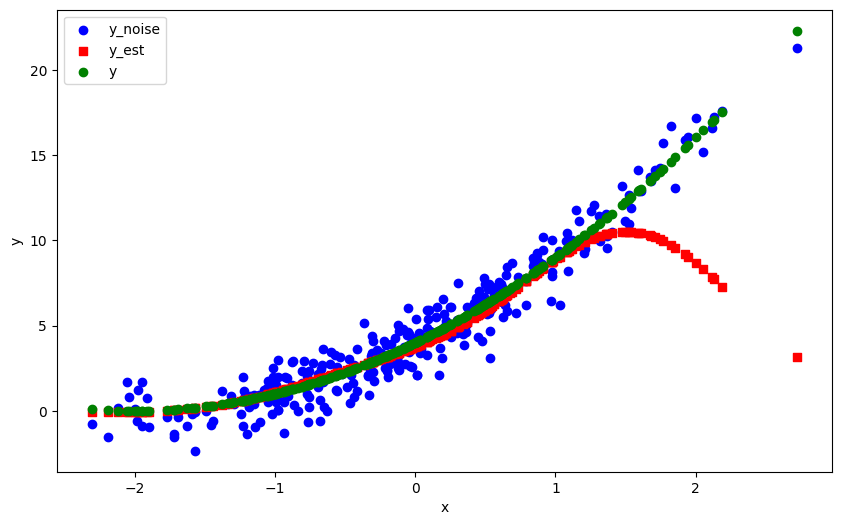

The programm is closed


In [5]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 0], X_true.detach().numpy()[:, 1], label='y_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 0], x_est.detach().numpy()[:, 1], label='y_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 0], X.detach().numpy()[:, 1], label='y', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")

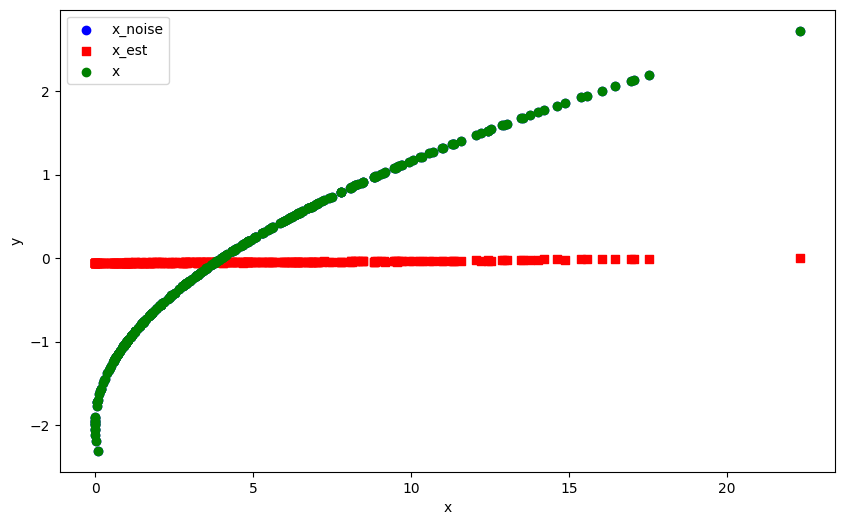

The programm is closed


In [4]:
plt.figure(figsize=(10, 6))  # Optional: specifies the figure size
plt.scatter(X.detach().numpy()[:, 1], X_true.detach().numpy()[:, 0], label='x_noise', color='blue', marker='o')  # Plot x vs. y1
plt.scatter(X.detach().numpy()[:, 1], x_est.detach().numpy()[:, 0], label='x_est', color='red', marker='s') 
plt.scatter(X.detach().numpy()[:, 1], X.detach().numpy()[:, 0], label='x', color='green', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("The programm is closed")